# 1. Introduction

# 2. Import Libraries

In [37]:
# Import Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose

Libraries berhasil di import

# 3. Data Loading

Data diambil dari hasil webscraping yang mana sudah tersimpan dalam bentuk csv yang berjudul `shrimp_prices.cvs`

In [38]:
# Load Data
df_raw = pd.read_csv("shrimp_prices.csv")
df = df_raw.copy()
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25112\1764350652.py:2: DtypeWarning: Columns (90,131,140,141,142,146,150,151,152,153,154,155,156,157,159,160,163) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("shrimp_prices.csv")


,id,species_id,date,size_20,size_30,size_40,size_50,size_60,size_70,size_80,...,creator.state.access_samplino,creator.state.photo_sampling_chart_coachmark_shown,creator.state.photo_sampling_result_coachmark_running,creator.state.access_feedo,creator.state.asto_coachmark_shown,creator.state.access_ocr,creator.state.phone_sms_reset_password_otp_sent,creator.state.add_cycle_modal_tour_complete,creator.state.sampling_boxes,creator.state
0,6757,1,2024-09-12,90000.0,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6756,1,2024-09-12,90000.0,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6755,1,2024-09-12,90000.0,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6754,1,2024-09-12,90000.0,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6753,1,2024-09-12,90000.0,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,5,1,2018-08-29,NaN,100000.0,88000.0,78000.0,72000.0,69000.0,66000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
6208,4,1,2018-08-13,NaN,NaN,NaN,78000.0,74000.0,71000.0,69000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
6209,3,1,2018-08-03,NaN,NaN,81000.0,73000.0,70000.0,67000.0,64000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
6210,1,1,2018-07-31,NaN,90000.0,79000.0,72000.0,69000.0,65000.0,63000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN


Data berhasil di unggah sehingga dapat dilihat bahwa data terdiri dari 6212 baris dengan 165 kolom.

In [39]:
# Cek Kolom
df.columns

Index(['id', 'species_id', 'date', 'size_20', 'size_30', 'size_40', 'size_50',
       'size_60', 'size_70', 'size_80',
       ...
       'creator.state.access_samplino',
       'creator.state.photo_sampling_chart_coachmark_shown',
       'creator.state.photo_sampling_result_coachmark_running',
       'creator.state.access_feedo', 'creator.state.asto_coachmark_shown',
       'creator.state.access_ocr',
       'creator.state.phone_sms_reset_password_otp_sent',
       'creator.state.add_cycle_modal_tour_complete',
       'creator.state.sampling_boxes', 'creator.state'],
      dtype='object', length=165)

Setelah dilakukan eksplorasi data, kolom yang dibutuhkan yaitu `date`, `size_30`, `size_40`, `size_50`, `size_60`, `size_70`, `size_80`, `size_100`, dan `province_id`. Pemilihan size udang dari 30-100 berdasarkan batasan masalah pada proyek ini yaitu petambak biasanya menargetkan minimal size 100 saat panen parsial pertama. Udang size 100 sudah memiliki nilai ekonomi yang baik dan cukup banyak dicari oleh pembeli di pasaran. Selain size 100, permintaan akan udang size 80 hingga size 30 juga banyak di pasar domestik maupun ekspor. (Sumber: https://jala.tech/id)



In [40]:
# Mengambil kolom yang dibutuhkan 

df_new = df[['date', 'size_30', 'size_40', 'size_50',
       'size_60', 'size_70', 'size_80', 'size_100', 'province_id']]
df_new

,date,size_30,size_40,size_50,size_60,size_70,size_80,size_100,province_id
0,2024-09-12,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,53000.0,33
1,2024-09-12,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,53000.0,33
2,2024-09-12,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,53000.0,33
3,2024-09-12,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,53000.0,33
4,2024-09-12,82000.0,73000.0,70000.0,67000.0,64000.0,60000.0,53000.0,33
...,...,...,...,...,...,...,...,...,...
6207,2018-08-29,100000.0,88000.0,78000.0,72000.0,69000.0,66000.0,62000.0,33
6208,2018-08-13,NaN,NaN,78000.0,74000.0,71000.0,69000.0,63000.0,18
6209,2018-08-03,NaN,81000.0,73000.0,70000.0,67000.0,64000.0,59000.0,34
6210,2018-07-31,90000.0,79000.0,72000.0,69000.0,65000.0,63000.0,59000.0,32


Batasan masalah kedua, berkaitan dengan fokus proyek ini yaitu provinsi yang diambil yaitu Provinsi Jawa Timur. Dalam dataset ini, province_id untuk Provinsi Jawa Timur adalah 35 sehingga selanjutnya dilakukan filtering.

In [41]:
# Filter untuk jawa timur saja

df_jatim = df_new[df_new.province_id == '35'].reset_index(drop=True)
df_jatim

,date,size_30,size_40,size_50,size_60,size_70,size_80,size_100,province_id
0,2024-09-09,79000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,35
1,2024-09-09,79000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,35
2,2024-09-09,79000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,35
3,2024-09-02,80000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,35
4,2024-09-02,80000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,35
...,...,...,...,...,...,...,...,...,...
2086,2018-12-07,NaN,NaN,62000.0,58000.0,55000.0,52000.0,46000.0,35
2087,2018-12-07,86000.0,72000.0,66000.0,63000.0,59000.0,56000.0,50000.0,35
2088,2018-11-22,89000.0,79000.0,72000.0,68000.0,65000.0,62000.0,56000.0,35
2089,2018-10-26,NaN,82000.0,77000.0,73000.0,70000.0,67000.0,61000.0,35


Filtering berhasil dilakukan, kini hanya harga udang di Provinsi Jawa Timur saja dan disimpan dalam variabel `df_jatim`

In [42]:
# Mengubah province_id menjadi provinsi dan isinya 35 jadi JAWA TIMUR 

df_jatim = df_jatim.rename(columns={'province_id': 'provinsi'})
df_jatim['provinsi'] = df_jatim['provinsi'].replace({'35': 'JAWA TIMUR'})
df_jatim


,date,size_30,size_40,size_50,size_60,size_70,size_80,size_100,provinsi
0,2024-09-09,79000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,JAWA TIMUR
1,2024-09-09,79000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,JAWA TIMUR
2,2024-09-09,79000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,JAWA TIMUR
3,2024-09-02,80000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,JAWA TIMUR
4,2024-09-02,80000.0,74000.0,68000.0,66000.0,62000.0,60000.0,54000.0,JAWA TIMUR
...,...,...,...,...,...,...,...,...,...
2086,2018-12-07,NaN,NaN,62000.0,58000.0,55000.0,52000.0,46000.0,JAWA TIMUR
2087,2018-12-07,86000.0,72000.0,66000.0,63000.0,59000.0,56000.0,50000.0,JAWA TIMUR
2088,2018-11-22,89000.0,79000.0,72000.0,68000.0,65000.0,62000.0,56000.0,JAWA TIMUR
2089,2018-10-26,NaN,82000.0,77000.0,73000.0,70000.0,67000.0,61000.0,JAWA TIMUR


Data pada kolom provinsi berhasil diubah

In [43]:
# Cek info data
df_jatim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2091 non-null   object 
 1   size_30   1749 non-null   float64
 2   size_40   1773 non-null   float64
 3   size_50   1823 non-null   float64
 4   size_60   1823 non-null   float64
 5   size_70   1899 non-null   float64
 6   size_80   1901 non-null   float64
 7   size_100  2091 non-null   float64
 8   provinsi  2091 non-null   object 
dtypes: float64(7), object(2)
memory usage: 147.2+ KB


Dari info data diperoleh bahwa terdapat 9 kolom dengan 2091 baris yang detailnya sebagai berikut:

| Kolom | Deskripsi | Missing Value | Tipe Data |
|-----|-----|-----|-----|
| `date` |Tanggal | Tidak ada | Tidak Sesuai |
| `size_30` | Terdapat 30 ekor udang dalam berat satu kilogram | Ada | Sesuai |
| `size_40` | Terdapat 40 ekor udang dalam berat satu kilogram | Ada | Sesuai |
| `size_50` | Terdapat 50 ekor udang dalam berat satu kilogram | Ada | Sesuai |
| `size_60` | Terdapat 60 ekor udang dalam berat satu kilogram | Ada | Sesuai |
| `size_70` | Terdapat 70 ekor udang dalam berat satu kilogram | Ada | Sesuai |
| `size_80` | Terdapat 80 ekor udang dalam berat satu kilogram | Ada | Sesuai |
| `size_100` | Terdapat 100 ekor udang dalam berat satu kilogram | Tidak Ada | Sesuai |
| `provinsi` | Provinsi | Tidak Ada | Sesuai |

In [44]:
# Cke missing value
df_jatim.isnull().sum()

date          0
size_30     342
size_40     318
size_50     268
size_60     268
size_70     192
size_80     190
size_100      0
provinsi      0
dtype: int64

Dari data diatas dapat dilihat bahwa missing value terdapat pada udang dengan size 30 s/d 80. Missing value tertinggi berada di size_30 berjumlah 342 sedangkan terendah berada di size_80 berjumlah 190.

## 3.1 Handling Missing Value

Untuk mengatasi missing value dilakukan handling dengan cara **interpolasi linear**. Interpolasi tersebut dipilih karena:
- Cocok untuk data yang mengalami perubahan secara linier dari waktu ke waktu.
- Cara kerjanya yaitu dengan mengisi missing values dengan memperkirakan nilai di antara dua titik berdasarkan gradien linier.
- Sederhana dan mudah diterapkan.
- Umumnya digunakan jika perubahan harga dari waktu ke waktu relatif stabil dan tidak ada fluktuasi ekstrem.

In [45]:
# Handling missing value 
kolom_size = ['size_30', 'size_40', 'size_50', 'size_60', 'size_70', 'size_80']
df_jatim[kolom_size] = df_jatim[kolom_size].interpolate(method='linear')

In [46]:
# Cek missing value
df_jatim.isnull().sum()

date        0
size_30     0
size_40     0
size_50     0
size_60     0
size_70     0
size_80     0
size_100    0
provinsi    0
dtype: int64

Handling missing value berhasil dilakukan sehingga kini semua kolom berjumlah 0.

## 3.2 Changing Data Type

Karena kolom  `date` belum sesuai tipe datanya yang mana seharusnya adalah datetimes, maka dilakukan perubahan.

In [47]:
# Mengubah tipe data
df_jatim['date'] = pd.to_datetime(df_jatim['date'])
df_jatim.dtypes

date        datetime64[ns]
size_30            float64
size_40            float64
size_50            float64
size_60            float64
size_70            float64
size_80            float64
size_100           float64
provinsi            object
dtype: object

 Kini perubahan berhasil dilakukan.

## 3.3 Data Regularity

In [48]:
# Periksa apakah tanggal memiliki keteraturan
df_jatim['date'].diff().value_counts()

date
0 days      1660
-7 days      148
-1 days       70
-2 days       48
-3 days       38
-6 days       33
-4 days       32
-5 days       32
-8 days        6
-9 days        6
-14 days       5
-15 days       2
-11 days       2
-12 days       1
-16 days       1
-23 days       1
-13 days       1
-10 days       1
-18 days       1
-27 days       1
-42 days       1
Name: count, dtype: int64

Dapat dilihat bahwa kolom `date` tidak teratur, terdapat beberapa kelongkapan hari. Hal tersebut menunjukkan bahwa data harga udang pada website https://jala.tech/id tidak selalu di unggah atau di update setiap harinya. Dengan demikian, diperlukan imputasi baik dengan harian atau mingguan.

### 3.3.1 Data Regularity Based on Days

Dilakukan imputasi secara harian

In [49]:
# Mengecek apakah 'date' merupakan index
if 'date' not in df_jatim.columns:
    print("'date' is already the index")
else:
    # Tetapkan kolom 'date' sebagai indeks dan assign kembali ke df_jatim
    df_jatim = df_jatim.set_index('date')
# Resampling df_jatim secara harian
for col in df_jatim.columns:
    if df_jatim[col].dtype == 'object':
        try:
            df_jatim[col] = pd.to_numeric(df_jatim[col])
        except ValueError:
            print(f"Could not convert column '{col}' to numeric")
df_day = df_jatim.resample('D').mean(numeric_only=True)

Could not convert column 'provinsi' to numeric


Imputasi secara harian berhasil dilakukan.

In [50]:
# Cek data
df_day

,size_30,size_40,size_50,size_60,size_70,size_80,size_100
date,,,,,,,
2018-09-14,101000.0,90000.0,81000.0,77000.0,74000.0,71000.0,65000.0
2018-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kini jumlah data menjadi 2188 baris dan 7 kolom. Dapat dilihat secara sekilas bahwa banyak terdapat data yang NaN.

In [51]:
# Cek missing value
df_day.isnull().sum()

size_30     1757
size_40     1757
size_50     1757
size_60     1757
size_70     1757
size_80     1757
size_100    1757
dtype: int64

Setelah dilakukan cek missing value dapat dilihat bahwa semua kolom terdapat missing value berjumlah 1752 padahal dataset hanya berjumlah 2188. Hampir 80% hasil imputasi menyebabkan missing value. Maka dari itu, dilakukan handling dengan **Interpolasi Polinomial** yang mana:
- Cocok untuk data yang menunjukkan pola non-linear yang lebih kuat.
- Cara kerjanya yaitu menggunakan fungsi polinomial tingkat tinggi untuk mengisi missing values.
- Dapat menangkap perubahan yang lebih cepat atau kompleks dibandingkan interpolasi linear.
- Umumnya digunakan jika melihat adanya perubahan mendadak atau pola non-linear dalam data.

atau secara singkat **Jika ada fluktuasi yang lebih tajam dalam data harian, interpolasi polinomial dapat menangani pola non-linear yang lebih kompleks**.

In [52]:
# Handle missing value
data_resampled_day = df_day.interpolate(method='polynomial', order=3)
data_resampled_day

,size_30,size_40,size_50,size_60,size_70,size_80,size_100
date,,,,,,,
2018-09-14,101000.000000,90000.000000,81000.000000,77000.000000,74000.000000,71000.000000,65000.000000
2018-09-15,100880.441128,88927.287547,79842.824058,76716.536316,73635.113596,70635.113596,64636.753674
2018-09-16,100760.430423,87921.573054,78769.455262,76449.189013,73292.651791,70292.651790,64295.804881
2018-09-17,100639.916536,86981.059370,77777.493213,76197.437995,72971.919258,69971.919256,63976.461824
2018-09-18,100518.848115,86103.949340,76864.537514,75960.763161,72672.220669,69672.220667,63678.032707
...,...,...,...,...,...,...,...
2024-09-05,73279.508428,70647.144503,64874.159962,65430.335943,59670.800269,58978.654282,92091.833339
2024-09-06,72410.347294,70285.048263,64505.533463,65348.955363,59377.018489,58832.747750,97533.523816
2024-09-07,72831.940848,70602.460019,64780.755803,65389.645653,59569.363924,58905.701016,94812.678577


Missing value berhasil di handling dan data disimpan dalam variabel `data_resampled_day`

### 3.3.2 Data Regularity Based on Week

Dilakukan imputasi secara mingguan

In [53]:
# Mengecek apakah 'date' merupakan index
if 'date' not in df_jatim.columns:
    print("'date' is already the index")
else:
    # Tetapkan kolom 'date' sebagai indeks dan assign kembali ke df_jatim
    df_jatim = df_jatim.set_index('date')
# Resampling df_jatim secara mingguan
for col in df_jatim.columns:
    if df_jatim[col].dtype == 'object':
        try:
            df_jatim[col] = pd.to_numeric(df_jatim[col])
        except ValueError:
            print(f"Could not convert column '{col}' to numeric")
df_week = df_jatim.resample('W').mean(numeric_only=True)

'date' is already the index
Could not convert column 'provinsi' to numeric


Imputasi secara mingguan berhasil dilakukan.

In [54]:
# Cek data 
df_week

,size_30,size_40,size_50,size_60,size_70,size_80,size_100
date,,,,,,,
2018-09-16,101000.000000,90000.000000,81000.000000,77000.000000,74000.000000,71000.000000,65000.000000
2018-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-08-18,80000.000000,75000.000000,68000.000000,65000.000000,62000.000000,60000.000000,53000.000000
2024-08-25,80000.000000,75000.000000,67514.150943,65000.000000,61028.301887,59028.301887,51509.915094
2024-09-01,83846.153846,76538.461538,69307.692308,65769.230769,62307.692308,59538.461538,53769.230769


Kini jumlah data menjadi 314 baris dan 7 kolom. Dapat dilihat secara sekilas bahwa banyak terdapat data yang NaN.

In [55]:
# Cek missing value 
df_week.isnull().sum()

size_30     25
size_40     25
size_50     25
size_60     25
size_70     25
size_80     25
size_100    25
dtype: int64

Setelah dilakukan cek missing value dapat dilihat bahwa semua kolom terdapat missing value berjumlah 25 dari dataset hanya berjumlah 314 (+- 12%). Maka dari itu, dilakukan handling dengan **interpolasi linear**. Interpolasi tersebut dipilih karena:
- Cocok untuk data yang mengalami perubahan secara linier dari waktu ke waktu.
- Cara kerjanya yaitu dengan mengisi missing values dengan memperkirakan nilai di antara dua titik berdasarkan gradien linier.
- Sederhana dan mudah diterapkan.
- Umumnya digunakan jika perubahan harga dari waktu ke waktu relatif stabil dan tidak ada fluktuasi ekstrem.

In [56]:
# Handle missing value
data_resampled_week = df_week.interpolate(method='linear')
data_resampled_week

,size_30,size_40,size_50,size_60,size_70,size_80,size_100
date,,,,,,,
2018-09-16,101000.000000,90000.000000,81000.000000,77000.000000,74000.000000,71000.000000,65000.000000
2018-09-23,100000.000000,88666.666667,80333.333333,76333.333333,73333.333333,70333.333333,64333.333333
2018-09-30,99000.000000,87333.333333,79666.666667,75666.666667,72666.666667,69666.666667,63666.666667
2018-10-07,98000.000000,86000.000000,79000.000000,75000.000000,72000.000000,69000.000000,63000.000000
2018-10-14,97000.000000,84666.666667,78333.333333,74333.333333,71333.333333,68333.333333,62333.333333
...,...,...,...,...,...,...,...
2024-08-18,80000.000000,75000.000000,68000.000000,65000.000000,62000.000000,60000.000000,53000.000000
2024-08-25,80000.000000,75000.000000,67514.150943,65000.000000,61028.301887,59028.301887,51509.915094
2024-09-01,83846.153846,76538.461538,69307.692308,65769.230769,62307.692308,59538.461538,53769.230769


Missing value berhasil di handling dan data disimpan dalam variabel `data_resampled_week`

### 3.3.3 Comparation between Days and Weeks

Dilakukan komparasi untuk menentukan data terbaik yang selanjutnya akan diolah. Sebelumnya telah dilkukan imputasi dengan hasil:
1. Based on Days = missing value berjumlah 1752 padahal dataset hanya berjumlah 2188 (+-80%).
2. Based on Weeks = missing value berjumlah 25 dari dataset hanya berjumlah 314 (+- 12%).

Berdasarkan hasil missing value tersebut, kami memilih data based on weeks dikarenakan:
- Perbandingan antara missing value dengan sample datanya lebih sedikit sehingga cenderung lebih stabil dan lengkap.
- Interpolasi yang dihasilkan lebih optimal karena jika banyak missing value justru bisa tidak realistis.
- Harga udang cenderung stabil dan tidak berubah drastis dari hari ke hari, jadi prediksi mingguan sudah cukup.

Maka selanjutnya data mingguan disimpan dalam csv dengan judul `shrimp_prices_week.csv`.

In [57]:
# Save data mingguan
data_resampled_week.to_csv('shrimp_prices_week.csv')

Data berhasil disimpan dalam format csv.

# 4. Exploraroty Data Analysis

In [58]:
# Cek data 
data_resampled_week

,size_30,size_40,size_50,size_60,size_70,size_80,size_100
date,,,,,,,
2018-09-16,101000.000000,90000.000000,81000.000000,77000.000000,74000.000000,71000.000000,65000.000000
2018-09-23,100000.000000,88666.666667,80333.333333,76333.333333,73333.333333,70333.333333,64333.333333
2018-09-30,99000.000000,87333.333333,79666.666667,75666.666667,72666.666667,69666.666667,63666.666667
2018-10-07,98000.000000,86000.000000,79000.000000,75000.000000,72000.000000,69000.000000,63000.000000
2018-10-14,97000.000000,84666.666667,78333.333333,74333.333333,71333.333333,68333.333333,62333.333333
...,...,...,...,...,...,...,...
2024-08-18,80000.000000,75000.000000,68000.000000,65000.000000,62000.000000,60000.000000,53000.000000
2024-08-25,80000.000000,75000.000000,67514.150943,65000.000000,61028.301887,59028.301887,51509.915094
2024-09-01,83846.153846,76538.461538,69307.692308,65769.230769,62307.692308,59538.461538,53769.230769


Date diubah menjadi kolom agar memudahkan analisa

## 4.1 Tren Harga

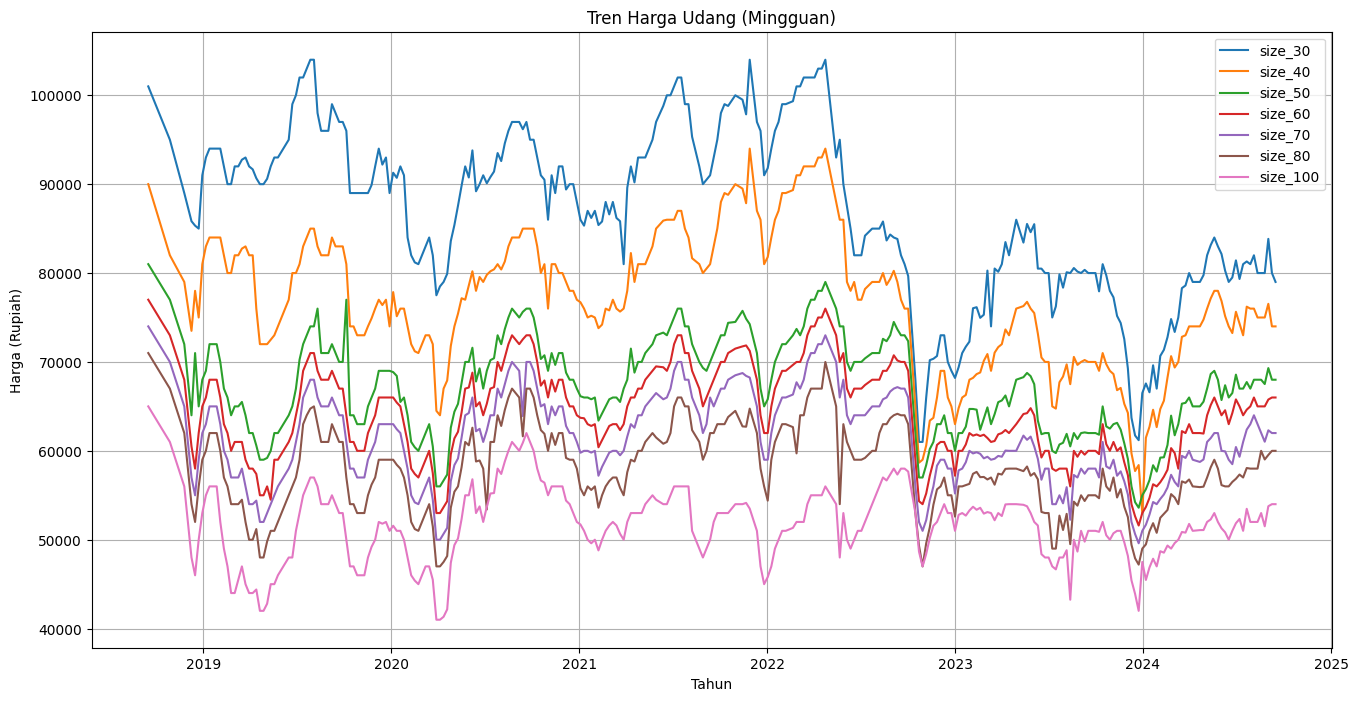

In [59]:
# Plot tren harga secara keseluruhan size
plt.figure(figsize=(16, 8))
for column in data_resampled_week.columns:
    plt.plot(data_resampled_week.index, data_resampled_week[column], label=column)

plt.title("Tren Harga Udang (Mingguan)")
plt.xlabel("Tahun")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.legend()
plt.show()

Berdasarkan plot diatas dapat dilihat bahwa:
1. Harga udang vaname secara berurutan dari tinggi kerendah yaitu size 30, size 40, size 50, size 60, size 70, size 80, dan size 100.
2. Tren harga udang pada setiap size cenderung tidak memiliki perbedaan yang signifikan dan cenderung merupakan **Multiplicative Model** karena data tersebut memiliki lebar & tinggi puncak yang tidak beraturan atau musiman (meningkat/menurun).
3. Penurunan harga udang vaname terjadi di sekitar kuartal ke 2/4 tahun 2019 dan 2020 serta kuartal 4/4 tahun 2022 dan 2023, dengan detail sebagai berikut:
   - Untuk tahun 2019 kemungkinan penurunan terjadi pengurangan permintaan khususnya dari luar negeri dikarenakan stok yang mereka punya sudah penuh. (1)
   - Untuk tahun 2020 kemungkinan penurunan terjadi karena adanya pandemi covid-19 yang melanda Indonesia sehingga berpengaruh terhadap permintaan. (2)
   - Untuk tahun 2022 dan 2023 kemungkinan penurunan terjadi karena adanya kelebihan pasokan udang di pasar global serta persaingan yang meningkat dari negara-negara seperti Ekuador dan China. (3)
Sumber:

(1). http://trobosaqua.com/detail-berita/2019/10/10/57/12131/menelisik-sebab-harga-udang-merosot

(2). https://jala.tech/id/blog/tips-budidaya/tren-harga-udang-2020-bagaimana-2021

(3). https://www.liputan6.com/amp/5546128/harga-udang-naik-turun-ekstrem-petambak-diminta-lakukan-ini




## 4.2 Size 30

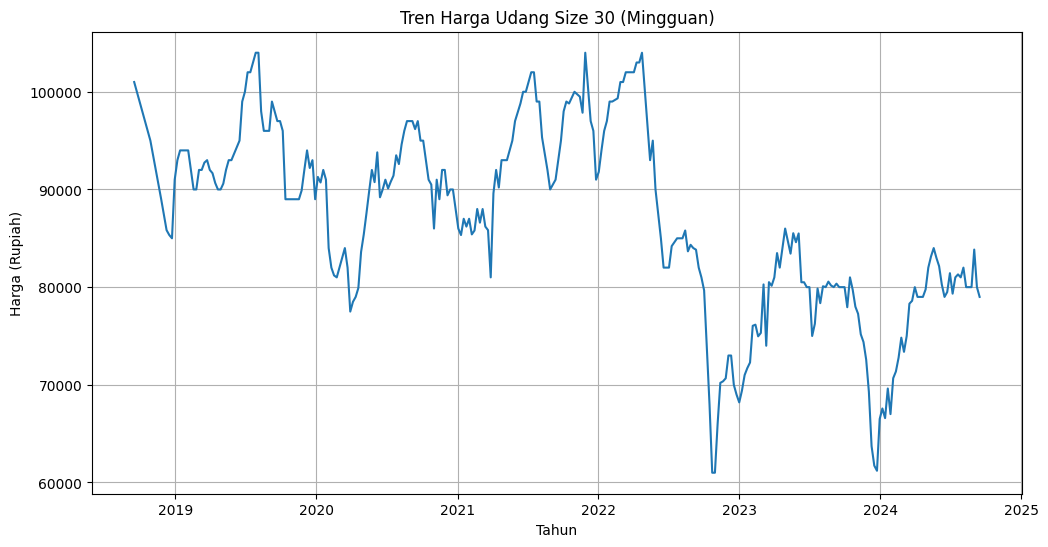

In [100]:
# Plot harga size 30
plt.figure(figsize=(12, 6))
plt.plot(data_resampled_week.index, data_resampled_week['size_30'])
plt.title(f"Tren Harga Udang Size 30 (Mingguan)")
plt.xlabel("Tahun")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.show()

Dari plot tren diatas dapat diketahui bahwa:
1. Data untuk size 30 merupakan **Multiplicative Model** karena data tersebut memiliki lebar & tinggi puncak yang tidak beraturan atau musiman (meningkat/menurun).
2. Terjadi penurunan yang cukup anjlok pada akhir tahun 2022 dan 2023 yang mana disebabkan oleh adanya kelebihan pasokan udang di pasar global serta persaingan yang meningkat dari negara-negara seperti Ekuador dan China. (1)

Sumber:

(1). http://trobosaqua.com/detail-berita/2019/10/10/57/12131/menelisik-sebab-harga-udang-merosot

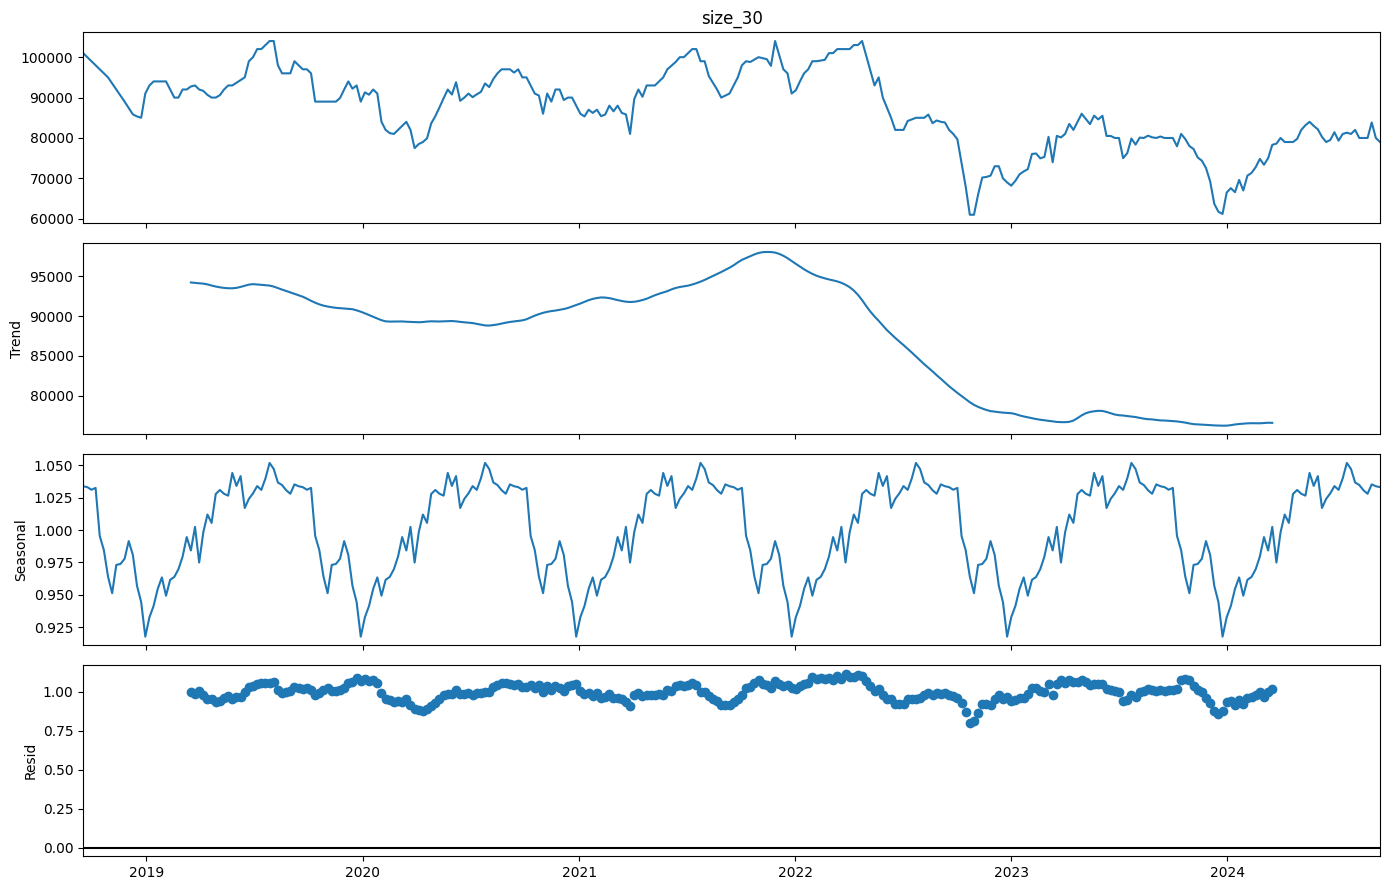

In [60]:
# Decompose time series.

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data_resampled_week['size_30'], model='multiplicatif')
ax=res.plot()
plt.show()

Dari gambar di atas dapat diperoleh bahwa: 
- Data jelas memiliki **tren turun linier**.
- Pola **musiman** yang jelas dengan durasi tahunan hadir dalam data.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25112\469781600.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


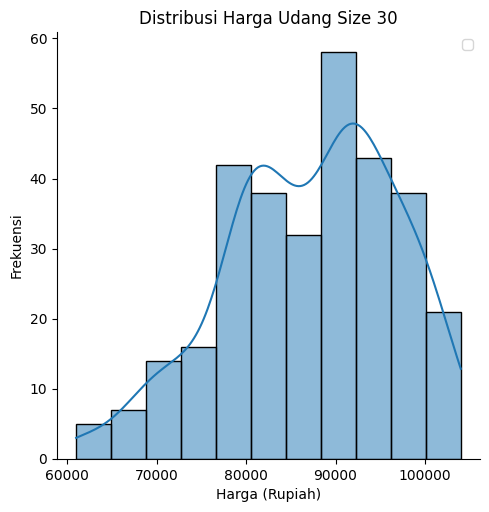

In [61]:
# Distribusi harga size 30
sns.displot(data=data_resampled_week, x='size_30', kde=True)
plt.title('Distribusi Harga Udang Size 30')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Frekuensi')
plt.legend()

In [62]:
# Menghitung pada kolom size_30
print(f"Central Tedency:")
print('Rata-rata harga udang size 30 yaitu:\t',data_resampled_week['size_30'].mean(),'Rupiah')
print('Median dari harga udang size 30 yaitu:\t',data_resampled_week['size_30'].median(),'Rupiah')
print('Modus dari harga udang size 30 yaitu:\t',data_resampled_week['size_30'].mode()[0],'Rupiah')
print(f"\nDispersasi:")
print('Selisih atau range dari data harga udang size 30 yaitu:\t\t', data_resampled_week['size_30'].max() - data_resampled_week['size_30'].min(), 'Rupiah')
print('Nilai minimum dari data harga udang size 30 yaitu:\t\t', data_resampled_week['size_30'].min(), 'Rupiah')
print('Nilai maksimum dari data harga udang size 30 yaitu:\t\t', data_resampled_week['size_30'].max(), 'Rupiah')
print(f"\nSkewness dan Kurtosis:")
print(f"Skewness yang dihasilkan yaitu: {data_resampled_week['size_30'].skew()}")
print(f"Kurtosis yang dihasilkan yaitu: {data_resampled_week['size_30'].kurtosis()}")

Central Tedency:
Rata-rata harga udang size 30 yaitu:	 87180.67372249124 Rupiah
Median dari harga udang size 30 yaitu:	 89000.0 Rupiah
Modus dari harga udang size 30 yaitu:	 92000.0 Rupiah

Dispersasi:
Selisih atau range dari data harga udang size 30 yaitu:		 43000.0 Rupiah
Nilai minimum dari data harga udang size 30 yaitu:		 61000.0 Rupiah
Nilai maksimum dari data harga udang size 30 yaitu:		 104000.0 Rupiah

Skewness dan Kurtosis:
Skewness yang dihasilkan yaitu: -0.4293365621751814
Kurtosis yang dihasilkan yaitu: -0.3437390033290666


Dari hasil diatas dapat diperoleh bahwa:
1. Hasil skewness bernilai -0.43 < -0.5  dan menunjukkan bahwa data tergolong approximately symetric dan agak condong ke kiri atau left-skewed distribution.
2. Hasil kurtosis bernilai -0.34 < 3 menujukkan bahwa data tergolong merupakan Platykurtic(long Tailed) dengan high standard deviasion.
3. Berdasarkan poin 1, maka median lebih tepat untuk menggambarkan distribusi harga size 30. Nilai median yang dihasilkan yaitu sebesar 89.000 Rupiah.
4. Nilai minimum harga udang vaname untuk size 30 yaitu sebesar 61.000 Rupiah sedangkan maksimumnya sebesar 104.000 Rupiah


## 4.3 Size 40

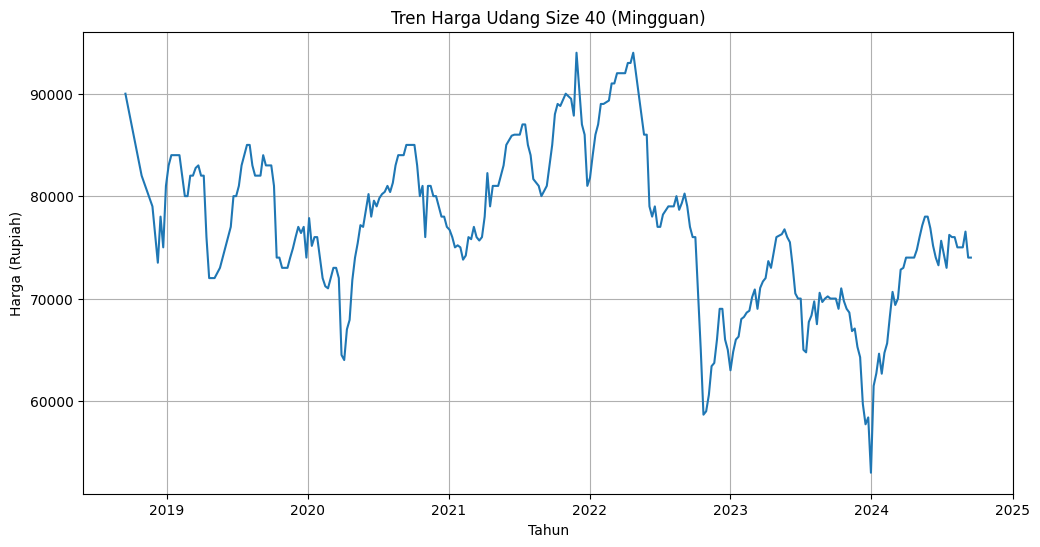

In [63]:
# Plot harga size 30
plt.figure(figsize=(12, 6))
plt.plot(data_resampled_week.index, data_resampled_week['size_40'])
plt.title(f"Tren Harga Udang Size 40 (Mingguan)")
plt.xlabel("Tahun")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.show()

Dari plot tren diatas dapat diketahui bahwa:
1. Data untuk size 40 merupakan **Multiplicative Model** karena data tersebut memiliki lebar & tinggi puncak yang tidak beraturan atau musiman (meningkat/menurun).
2. Terjadi penurunan yang cukup anjlok pada akhir tahun 2022 dan 2023 yang mana disebabkan oleh adanya kelebihan pasokan udang di pasar global serta persaingan yang meningkat dari negara-negara seperti Ekuador dan China. (1)

Sumber:

(1). http://trobosaqua.com/detail-berita/2019/10/10/57/12131/menelisik-sebab-harga-udang-merosot

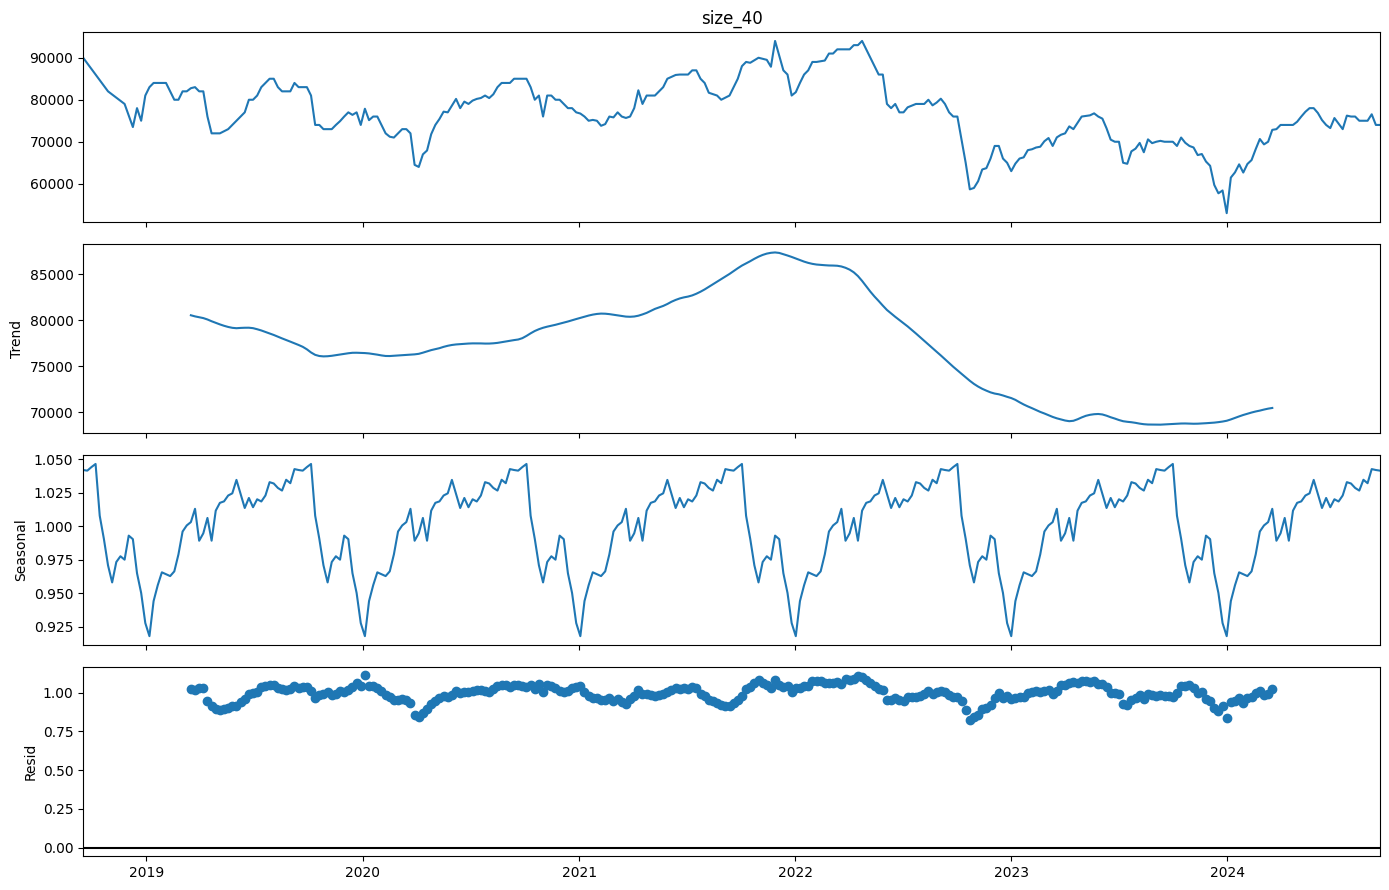

In [64]:
# Decompose time series.

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data_resampled_week['size_40'], model='multiplicatif')
ax=res.plot()
plt.show()

Dari gambar di atas dapat diperoleh bahwa: 
- Data jelas memiliki **tren naik turun linier**.
- Pola **musiman** yang jelas dengan durasi tahunan hadir dalam data.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25112\1795924311.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


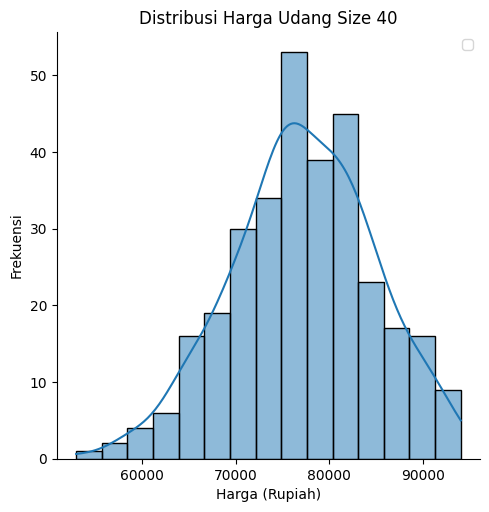

In [74]:
# Distribusi harga size 40
sns.displot(data=data_resampled_week, x='size_40', kde=True)
plt.title('Distribusi Harga Udang Size 40')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Frekuensi')
plt.legend()

In [91]:
# Menghitung pada kolom size_40
print(f"Central Tedency:")
print('Rata-rata harga udang size 40 yaitu:\t',data_resampled_week['size_40'].mean(),'Rupiah')
print('Median dari harga udang size 40 yaitu:\t',data_resampled_week['size_40'].median(),'Rupiah')
print('Modus dari harga udang size 40 yaitu:\t',data_resampled_week['size_40'].mode()[0],'Rupiah')
print(f"\nDispersasi:")
print('Selisih atau range dari data harga udang size 40 yaitu:\t\t', data_resampled_week['size_40'].max() - data_resampled_week['size_40'].min(), 'Rupiah')
print('Nilai minimum dari data harga udang size 40 yaitu:\t\t', data_resampled_week['size_40'].min(), 'Rupiah')
print('Nilai maksimum dari data harga udang size 40 yaitu:\t\t', data_resampled_week['size_40'].max(), 'Rupiah')
print(f"\nSkewness dan Kurtosis:")
print(f"Skewness yang dihasilkan yaitu: {data_resampled_week['size_40'].skew()}")
print(f"Kurtosis yang dihasilkan yaitu: {data_resampled_week['size_40'].kurtosis()}")

Central Tedency:
Rata-rata harga udang size 40 yaitu:	 77168.25150301756 Rupiah
Median dari harga udang size 40 yaitu:	 77000.0 Rupiah
Modus dari harga udang size 40 yaitu:	 76000.0 Rupiah

Dispersasi:
Selisih atau range dari data harga udang size 40 yaitu:		 41000.0 Rupiah
Nilai minimum dari data harga udang size 40 yaitu:		 53000.0 Rupiah
Nilai maksimum dari data harga udang size 40 yaitu:		 94000.0 Rupiah

Skewness dan Kurtosis:
Skewness yang dihasilkan yaitu: -0.1891429828018181
Kurtosis yang dihasilkan yaitu: -0.12696560490511377


Dari hasil diatas dapat diperoleh bahwa:
1. Hasil skewness bernilai -0.19 < -0.5  dan menunjukkan bahwa data tergolong approximately symetric dan agak condong ke kiri atau left-skewed distribution walaupun terlihat seperti distribusi normal.
2. Hasil kurtosis bernilai -0.13 < 3 menujukkan bahwa data tergolong merupakan Platykurtic(long Tailed) dengan high standard deviasion.
3. Berdasarkan poin 1, maka median lebih tepat untuk menggambarkan distribusi harga size 40. Nilai median yang dihasilkan yaitu sebesar 77.000 Rupiah.
4. Nilai minimum harga udang vaname untuk size 40 yaitu sebesar 53.000 Rupiah sedangkan maksimumnya sebesar 94.000 Rupiah

## 4.4 Size 50

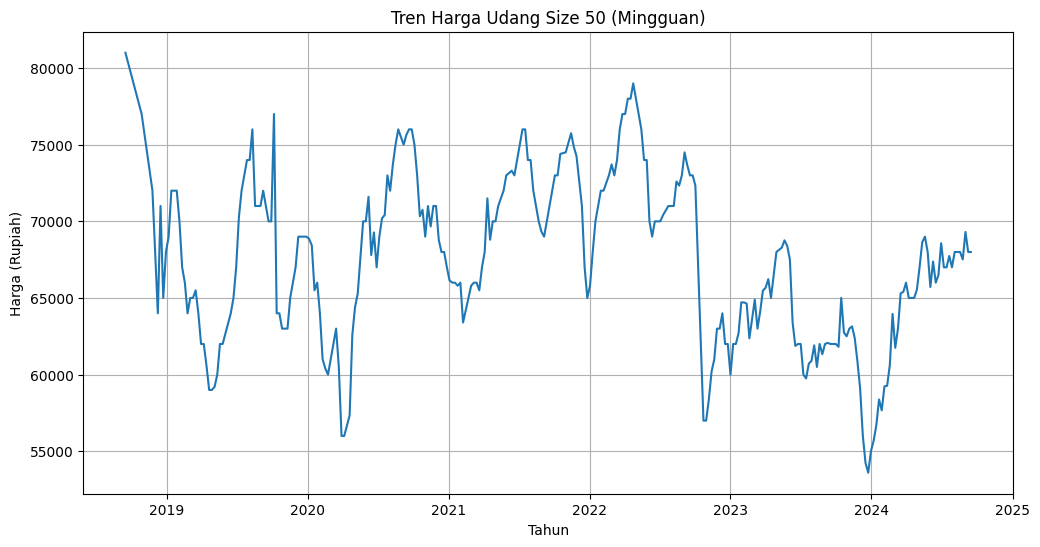

In [66]:
# Plot harga size 50
plt.figure(figsize=(12, 6))
plt.plot(data_resampled_week.index, data_resampled_week['size_50'])
plt.title(f"Tren Harga Udang Size 50 (Mingguan)")
plt.xlabel("Tahun")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.show()

Dari plot tren diatas dapat diketahui bahwa:
1. Data untuk size 50 merupakan **Multiplicative Model** karena data tersebut memiliki lebar & tinggi puncak yang tidak beraturan atau musiman (meningkat/menurun).
2. Terjadi penurunan pada kuartal 2/4 tahun 2019 kemungkinan diakibatkan dari pengurangan permintaan khususnya dari luar negeri dikarenakan stok yang mereka punya sudah penuh. (1)
3. Terjadi penurunan pada kuartal 2/4 tahun 2020 kemungkinan diakibatkan dari adanya pandemi covid-19 yang melanda Indonesia sehingga berpengaruh terhadap permintaan. (2)
4. Terjadi penurunan yang cukup anjlok pada akhir tahun 2022 dan 2023 yang mana disebabkan oleh adanya kelebihan pasokan udang di pasar global serta persaingan yang meningkat dari negara-negara seperti Ekuador dan China. (3)

Sumber:

(1). http://trobosaqua.com/detail-berita/2019/10/10/57/12131/menelisik-sebab-harga-udang-merosot

(2). https://jala.tech/id/blog/tips-budidaya/tren-harga-udang-2020-bagaimana-2021

(3). https://www.liputan6.com/amp/5546128/harga-udang-naik-turun-ekstrem-petambak-diminta-lakukan-ini

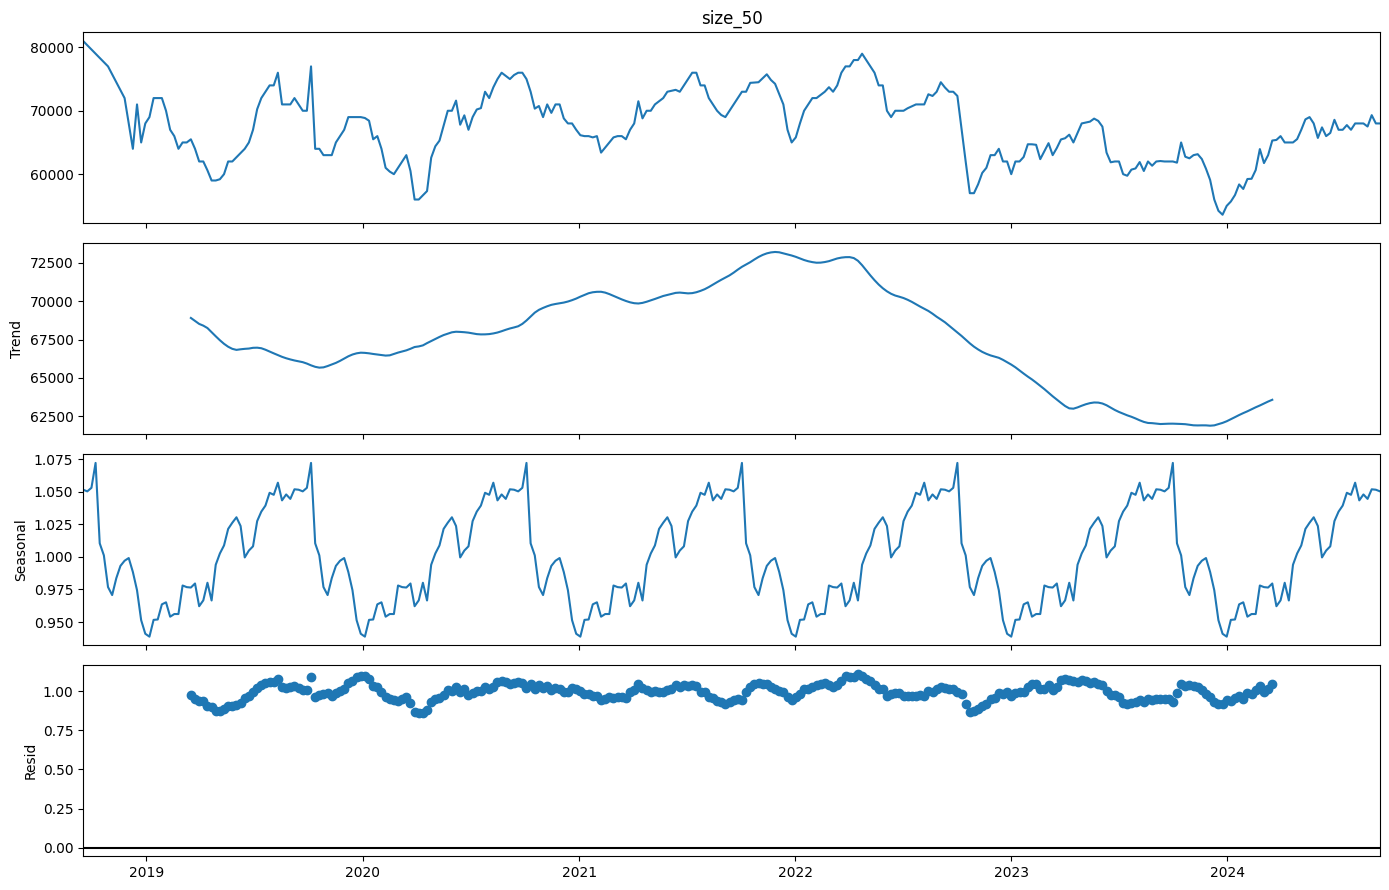

In [136]:
# Decompose the components from the time series.

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data_resampled_week['size_50'], model='multiplicatif')
ax=res.plot()
plt.show()

Dari gambar di atas dapat diperoleh bahwa: 
- Data jelas memiliki **tren naik turun**.
- Pola **musiman** yang jelas dengan durasi tahunan hadir dalam data.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25112\2782692250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


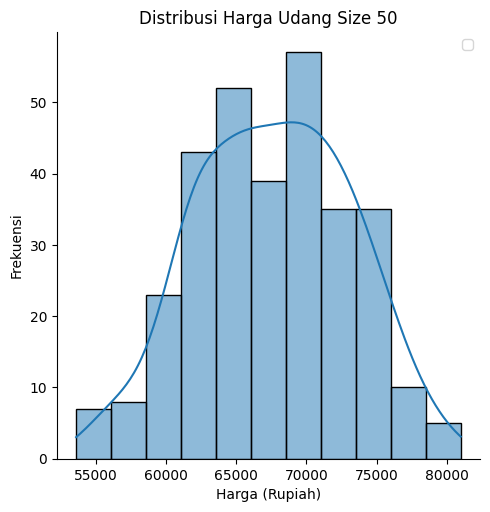

In [75]:
# Distribusi harga size 50
sns.displot(data=data_resampled_week, x='size_50', kde=True)
plt.title('Distribusi Harga Udang Size 50')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Frekuensi')
plt.legend()

In [104]:
# Menghitung pada kolom size_50
print(f"Central Tedency:")
print('Rata-rata harga udang size 50 yaitu:\t',data_resampled_week['size_50'].mean(),'Rupiah')
print('Median dari harga udang size 50 yaitu:\t',data_resampled_week['size_50'].median(),'Rupiah')
print('Modus dari harga udang size 50 yaitu:\t',data_resampled_week['size_50'].mode()[0],'Rupiah')
print(f"\nDispersasi:")
print('Selisih atau range dari data harga udang size 50 yaitu:\t\t', data_resampled_week['size_50'].max() - data_resampled_week['size_50'].min(), 'Rupiah')
print('Nilai minimum dari data harga udang size 50 yaitu:\t\t', data_resampled_week['size_50'].min(), 'Rupiah')
print('Nilai maksimum dari data harga udang size 50 yaitu:\t\t', data_resampled_week['size_50'].max(), 'Rupiah')
print(f"\nSkewness dan Kurtosis:")
print(f"Skewness yang dihasilkan yaitu: {data_resampled_week['size_50'].skew()}")
print(f"Kurtosis yang dihasilkan yaitu: {data_resampled_week['size_50'].kurtosis()}")

Central Tedency:
Rata-rata harga udang size 50 yaitu:	 67667.33566081764 Rupiah
Median dari harga udang size 50 yaitu:	 68000.0 Rupiah
Modus dari harga udang size 50 yaitu:	 62000.0 Rupiah

Dispersasi:
Selisih atau range dari data harga udang size 50 yaitu:		 27400.0 Rupiah
Nilai minimum dari data harga udang size 50 yaitu:		 53600.0 Rupiah
Nilai maksimum dari data harga udang size 50 yaitu:		 81000.0 Rupiah

Skewness dan Kurtosis:
Skewness yang dihasilkan yaitu: -0.05759624975630532
Kurtosis yang dihasilkan yaitu: -0.5460131774062318


Dari hasil diatas dapat diperoleh bahwa:
1. Hasil skewness bernilai -0.05 < -0.5  dan menunjukkan bahwa data tergolong approximately symetric.
2. Hasil kurtosis bernilai -0.54 < 3 menujukkan bahwa data tergolong merupakan Platykurtic(long Tailed) dengan high standard deviasion.
3. Berdasarkan poin 1, maka rata-rata lebih tepat untuk menggambarkan distribusi harga size 50. Nilai rata-rata yang dihasilkan yaitu sebesar 67.667 Rupiah.
4. Nilai minimum harga udang vaname untuk size 50 yaitu sebesar 53.600 Rupiah sedangkan maksimumnya sebesar 81.000 Rupiah

## 4.5 Size 60

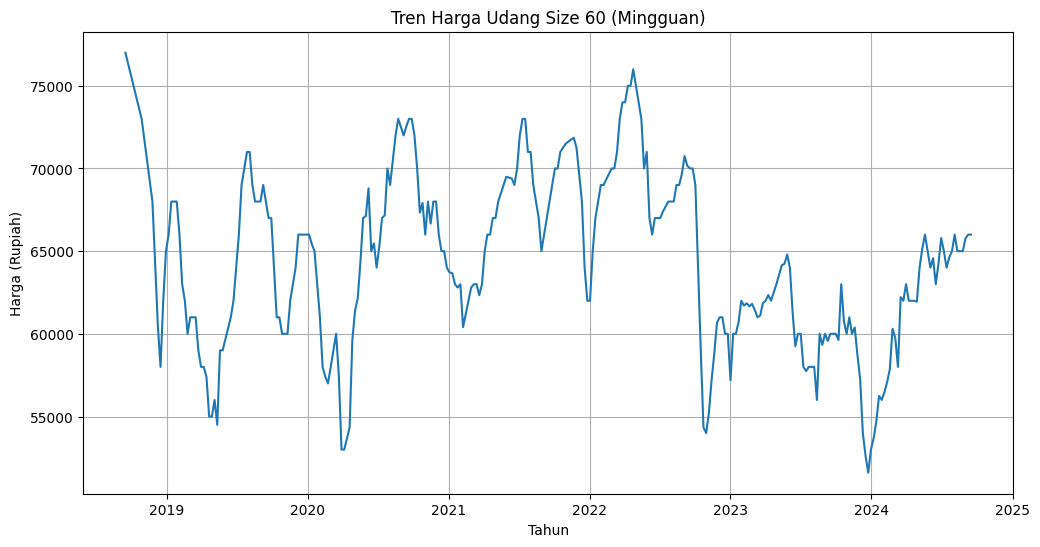

In [69]:
# Plot harga size 60
plt.figure(figsize=(12, 6))
plt.plot(data_resampled_week.index, data_resampled_week['size_60'])
plt.title(f"Tren Harga Udang Size 60 (Mingguan)")
plt.xlabel("Tahun")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.show()

Dari plot tren diatas dapat diketahui bahwa:
1. Data untuk size 50 merupakan **Multiplicative Model** karena data tersebut memiliki lebar & tinggi puncak yang tidak beraturan atau musiman (meningkat/menurun).
2. Terjadi penurunan pada kuartal 2/4 tahun 2019 kemungkinan diakibatkan dari pengurangan permintaan khususnya dari luar negeri dikarenakan stok yang mereka punya sudah penuh. (1)
3. Terjadi penurunan pada kuartal 2/4 tahun 2020 kemungkinan diakibatkan dari adanya pandemi covid-19 yang melanda Indonesia sehingga berpengaruh terhadap permintaan. (2)
4. Terjadi penurunan yang cukup anjlok pada akhir tahun 2022 dan 2023 yang mana disebabkan oleh adanya kelebihan pasokan udang di pasar global serta persaingan yang meningkat dari negara-negara seperti Ekuador dan China. (3)

Sumber:

(1). http://trobosaqua.com/detail-berita/2019/10/10/57/12131/menelisik-sebab-harga-udang-merosot

(2). https://jala.tech/id/blog/tips-budidaya/tren-harga-udang-2020-bagaimana-2021

(3). https://www.liputan6.com/amp/5546128/harga-udang-naik-turun-ekstrem-petambak-diminta-lakukan-ini

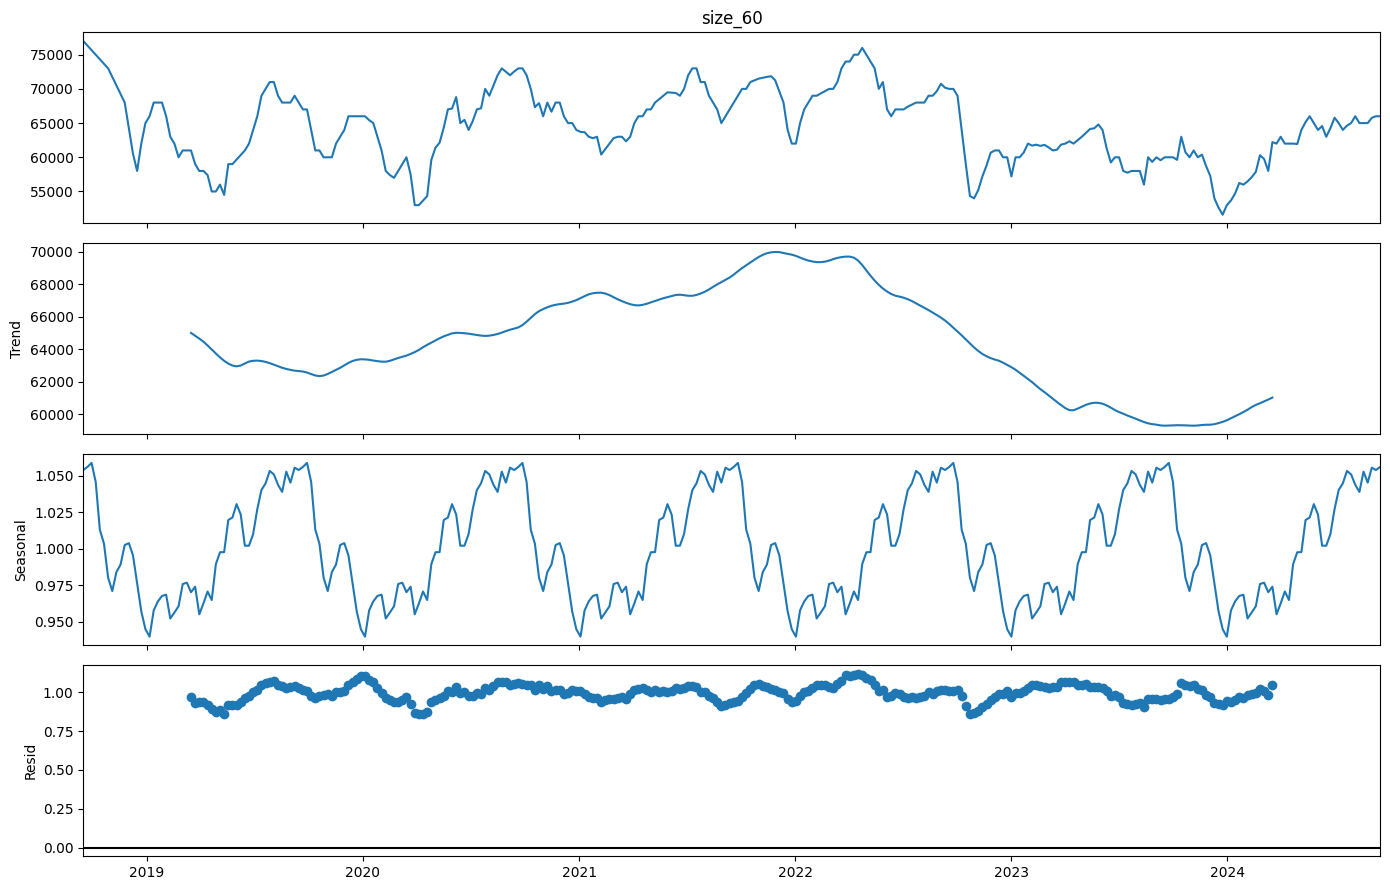

In [68]:
# Decompose time series.

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data_resampled_week['size_60'], model='multiplicatif')
ax=res.plot()
plt.show()

Dari gambar di atas dapat diperoleh bahwa: 
- Data jelas memiliki **tren naik turun**.
- Pola **musiman** yang jelas dengan durasi tahunan hadir dalam data.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25112\3573739078.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


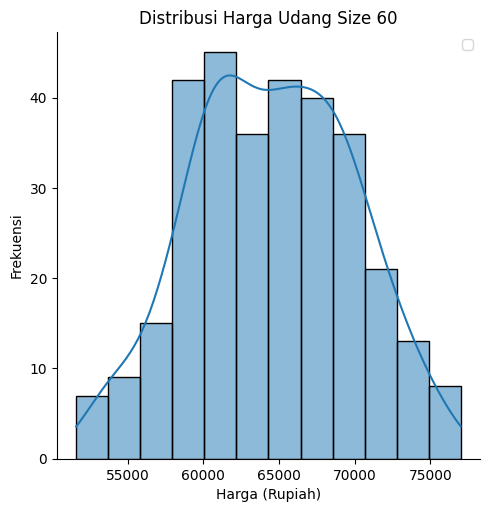

In [76]:
# Distribusi harga size 60
sns.displot(data=data_resampled_week, x='size_60', kde=True)
plt.title('Distribusi Harga Udang Size 60')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Frekuensi')
plt.legend()

In [108]:
# Menghitung pada kolom size_60
print(f"Central Tedency:")
print('Rata-rata harga udang size 60 yaitu:\t',data_resampled_week['size_60'].mean(),'Rupiah')
print('Median dari harga udang size 60 yaitu:\t',data_resampled_week['size_60'].median(),'Rupiah')
print('Modus dari harga udang size 60 yaitu:\t',data_resampled_week['size_60'].mode()[0],'Rupiah')
print(f"\nDispersasi:")
print('Selisih atau range dari data harga udang size 60 yaitu:\t\t', data_resampled_week['size_60'].max() - data_resampled_week['size_60'].min(), 'Rupiah')
print('Nilai minimum dari data harga udang size 60 yaitu:\t\t', data_resampled_week['size_60'].min(), 'Rupiah')
print('Nilai maksimum dari data harga udang size 60 yaitu:\t\t', data_resampled_week['size_60'].max(), 'Rupiah')
print(f"\nSkewness dan Kurtosis:")
print(f"Skewness yang dihasilkan yaitu: {data_resampled_week['size_60'].skew()}")
print(f"Kurtosis yang dihasilkan yaitu: {data_resampled_week['size_60'].kurtosis()}")

Central Tedency:
Rata-rata harga udang size 60 yaitu:	 64542.45335182226 Rupiah
Median dari harga udang size 60 yaitu:	 64715.21739130435 Rupiah
Modus dari harga udang size 60 yaitu:	 68000.0 Rupiah

Dispersasi:
Selisih atau range dari data harga udang size 60 yaitu:		 25400.0 Rupiah
Nilai minimum dari data harga udang size 60 yaitu:		 51600.0 Rupiah
Nilai maksimum dari data harga udang size 60 yaitu:		 77000.0 Rupiah

Skewness dan Kurtosis:
Skewness yang dihasilkan yaitu: -0.03837858171373204
Kurtosis yang dihasilkan yaitu: -0.5593592382158583


Dari hasil diatas dapat diperoleh bahwa:
1. Hasil skewness bernilai -0.03 < -0.5  dan menunjukkan bahwa data tergolong approximately symetric.
2. Hasil kurtosis bernilai -0.56 < 3 menujukkan bahwa data tergolong merupakan Platykurtic(long Tailed) dengan high standard deviasion.
3. Berdasarkan poin 1, maka rata-rata lebih tepat untuk menggambarkan distribusi harga size 60. Nilai rata-rata yang dihasilkan yaitu sebesar 64.542 Rupiah.
4. Nilai minimum harga udang vaname untuk size 60 yaitu sebesar 51.600 Rupiah sedangkan maksimumnya sebesar 77.000 Rupiah

## 4.6 Size 70

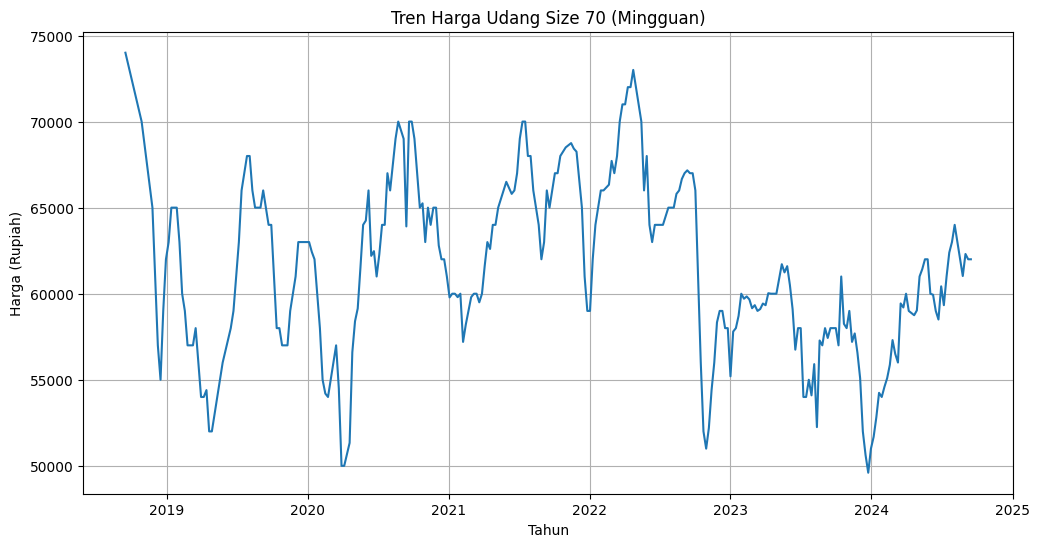

In [71]:
# Plot harga size 70
plt.figure(figsize=(12, 6))
plt.plot(data_resampled_week.index, data_resampled_week['size_70'])
plt.title(f"Tren Harga Udang Size 70 (Mingguan)")
plt.xlabel("Tahun")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.show()

Dari plot tren diatas dapat diketahui bahwa:
1. Data untuk size 70 merupakan **Multiplicative Model** karena data tersebut memiliki lebar & tinggi puncak yang tidak beraturan atau musiman (meningkat/menurun).
2. Terjadi penurunan pada kuartal 2/4 tahun 2019 kemungkinan diakibatkan dari pengurangan permintaan khususnya dari luar negeri dikarenakan stok yang mereka punya sudah penuh. (1)
3. Terjadi penurunan pada kuartal 2/4 tahun 2020 kemungkinan diakibatkan dari adanya pandemi covid-19 yang melanda Indonesia sehingga berpengaruh terhadap permintaan. (2)
4. Terjadi penurunan yang cukup anjlok pada akhir tahun 2022 dan 2023 yang mana disebabkan oleh adanya kelebihan pasokan udang di pasar global serta persaingan yang meningkat dari negara-negara seperti Ekuador dan China. (3)

Sumber:

(1). http://trobosaqua.com/detail-berita/2019/10/10/57/12131/menelisik-sebab-harga-udang-merosot

(2). https://jala.tech/id/blog/tips-budidaya/tren-harga-udang-2020-bagaimana-2021

(3). https://www.liputan6.com/amp/5546128/harga-udang-naik-turun-ekstrem-petambak-diminta-lakukan-ini

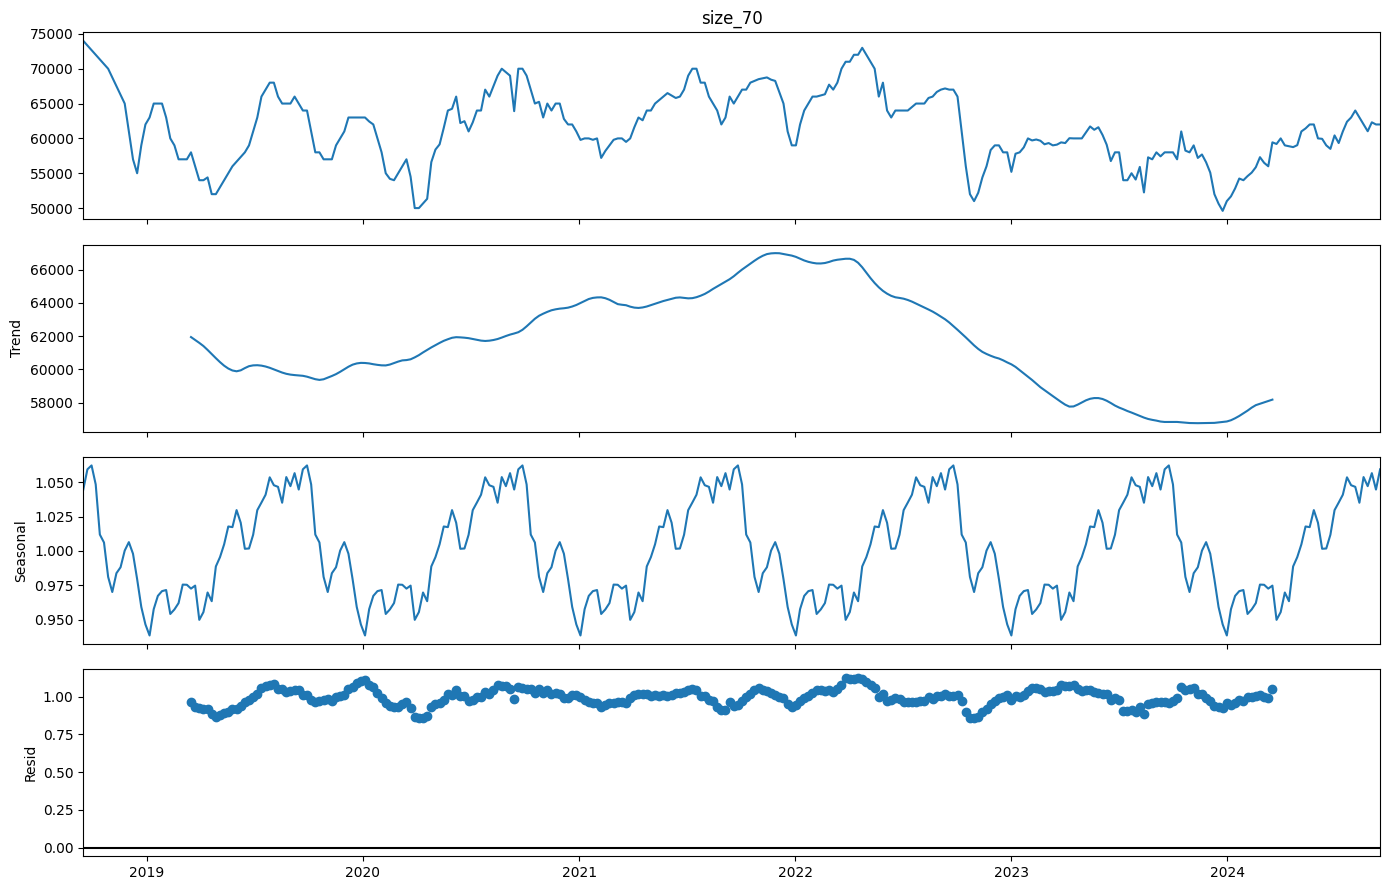

In [72]:
# Decompose the time series.

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data_resampled_week['size_70'], model='multiplicatif')
ax=res.plot()
plt.show()

Dari gambar di atas dapat diperoleh bahwa: 
- Data jelas memiliki **tren naik turun**.
- Pola **musiman** yang jelas dengan durasi tahunan hadir dalam data.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25112\3515571838.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


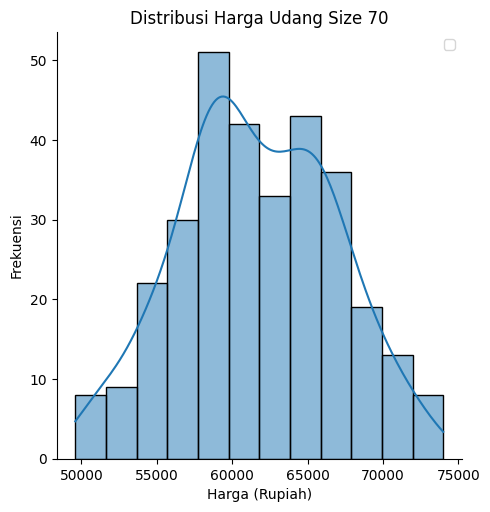

In [77]:
# Distribusi harga size 70
sns.displot(data=data_resampled_week, x='size_70', kde=True)
plt.title('Distribusi Harga Udang Size 70')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Frekuensi')
plt.legend()

In [112]:
# Menghitung pada kolom size_70
print(f"Central Tedency:")
print('Rata-rata harga udang size 70 yaitu:\t',data_resampled_week['size_70'].mean(),'Rupiah')
print('Median dari harga udang size 70 yaitu:\t',data_resampled_week['size_70'].median(),'Rupiah')
print('Modus dari harga udang size 70 yaitu:\t',data_resampled_week['size_70'].mode()[0],'Rupiah')
print(f"\nDispersasi:")
print('Selisih atau range dari data harga udang size 70 yaitu:\t\t', data_resampled_week['size_70'].max() - data_resampled_week['size_70'].min(), 'Rupiah')
print('Nilai minimum dari data harga udang size 70 yaitu:\t\t', data_resampled_week['size_70'].min(), 'Rupiah')
print('Nilai maksimum dari data harga udang size 70 yaitu:\t\t', data_resampled_week['size_70'].max(), 'Rupiah')
print(f"\nSkewness dan Kurtosis:")
print(f"Skewness yang dihasilkan yaitu: {data_resampled_week['size_70'].skew()}")
print(f"Kurtosis yang dihasilkan yaitu: {data_resampled_week['size_70'].kurtosis()}")

Central Tedency:
Rata-rata harga udang size 70 yaitu:	 61607.741947777045 Rupiah
Median dari harga udang size 70 yaitu:	 61333.33333333333 Rupiah
Modus dari harga udang size 70 yaitu:	 65000.0 Rupiah

Dispersasi:
Selisih atau range dari data harga udang size 70 yaitu:		 24400.0 Rupiah
Nilai minimum dari data harga udang size 70 yaitu:		 49600.0 Rupiah
Nilai maksimum dari data harga udang size 70 yaitu:		 74000.0 Rupiah

Skewness dan Kurtosis:
Skewness yang dihasilkan yaitu: 0.0037692861211806867
Kurtosis yang dihasilkan yaitu: -0.5290321663796744


Dari hasil diatas dapat diperoleh bahwa:
1. Hasil skewness bernilai 0.003 < -0.5  dan menunjukkan bahwa data tergolong approximately symetric.
2. Hasil kurtosis bernilai -0.52 < 3 menujukkan bahwa data tergolong merupakan Platykurtic(long Tailed) dengan high standard deviasion.
3. Berdasarkan poin 1, maka rata-rata lebih tepat untuk menggambarkan distribusi harga size 70. Nilai rata-rata yang dihasilkan yaitu sebesar 61.607 Rupiah.
4. Nilai minimum harga udang vaname untuk size 70 yaitu sebesar 49.600 Rupiah sedangkan maksimumnya sebesar 74.000 Rupiah

## 4.7 Size 80

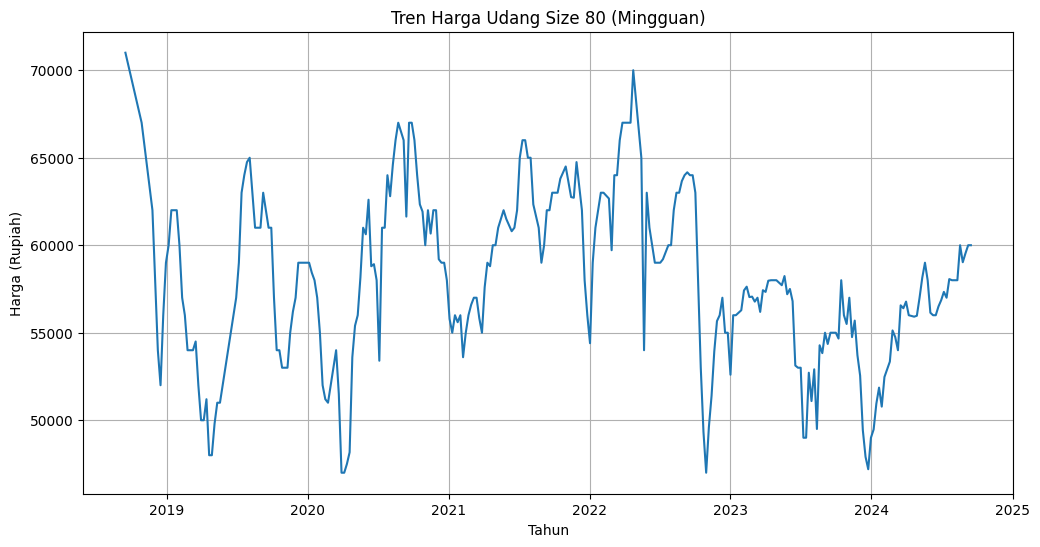

In [80]:
# Plot size 80
plt.figure(figsize=(12, 6))
plt.plot(data_resampled_week.index, data_resampled_week['size_80'])
plt.title(f"Tren Harga Udang Size 80 (Mingguan)")
plt.xlabel("Tahun")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.show()

Dari plot tren diatas dapat diketahui bahwa:
1. Data untuk size 80 merupakan **Multiplicative Model** karena data tersebut memiliki lebar & tinggi puncak yang tidak beraturan atau musiman (meningkat/menurun).
2. Terjadi penurunan pada kuartal 2/4 tahun 2019 kemungkinan diakibatkan dari pengurangan permintaan khususnya dari luar negeri dikarenakan stok yang mereka punya sudah penuh. (1)
3. Terjadi penurunan pada kuartal 2/4 tahun 2020 kemungkinan diakibatkan dari adanya pandemi covid-19 yang melanda Indonesia sehingga berpengaruh terhadap permintaan. (2)
4. Terjadi penurunan yang cukup anjlok pada akhir tahun 2022 dan 2023 yang mana disebabkan oleh adanya kelebihan pasokan udang di pasar global serta persaingan yang meningkat dari negara-negara seperti Ekuador dan China. (3)

Sumber:

(1). http://trobosaqua.com/detail-berita/2019/10/10/57/12131/menelisik-sebab-harga-udang-merosot

(2). https://jala.tech/id/blog/tips-budidaya/tren-harga-udang-2020-bagaimana-2021

(3). https://www.liputan6.com/amp/5546128/harga-udang-naik-turun-ekstrem-petambak-diminta-lakukan-ini

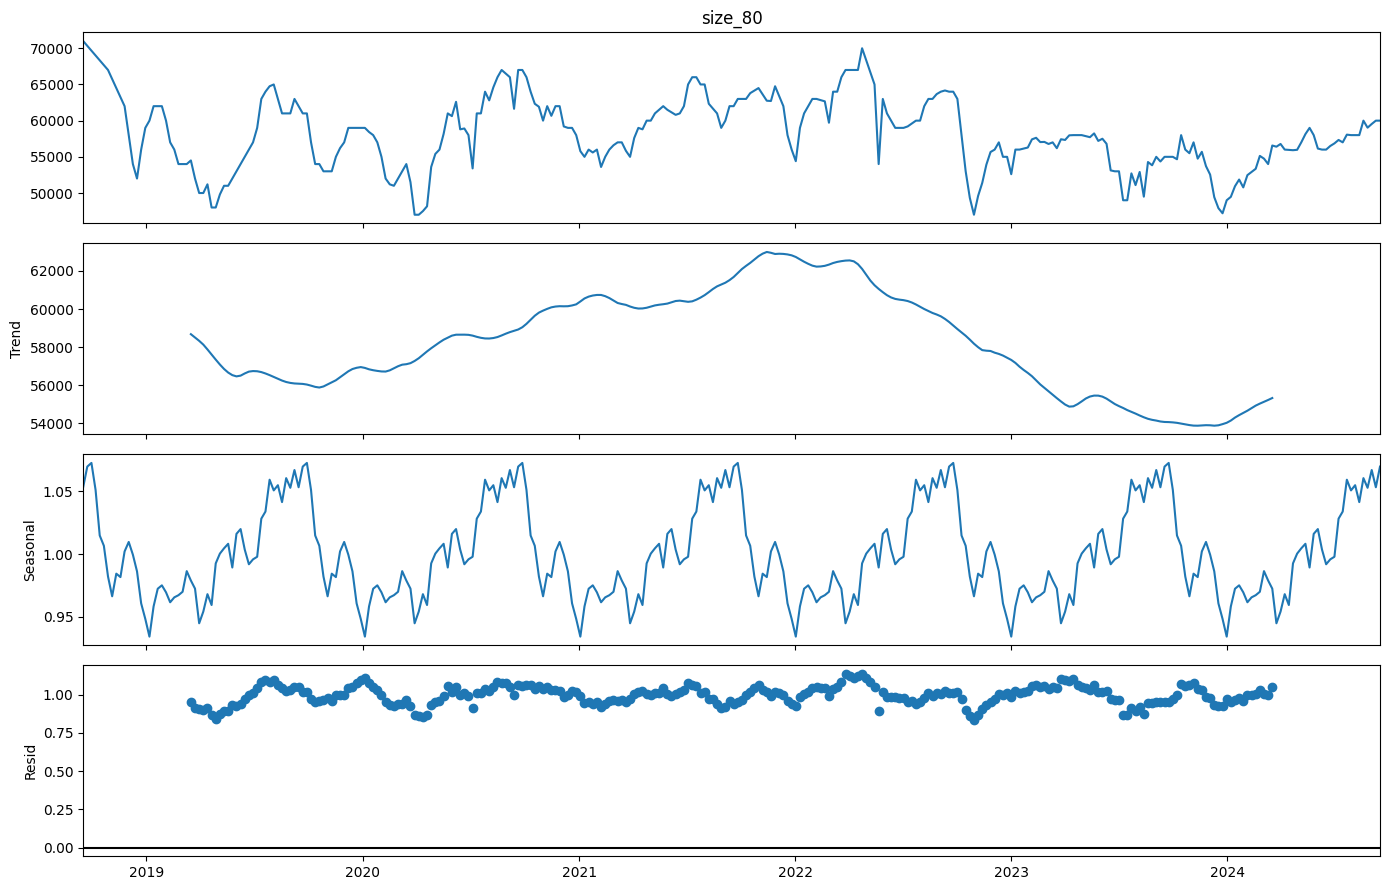

In [142]:
# Decompose the components from the time series.

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data_resampled_week['size_80'], model='multiplicatif')
ax=res.plot()
plt.show()

Dari gambar di atas dapat diperoleh bahwa: 
- Data jelas memiliki **tren naik turun**.
- Pola **musiman** yang jelas dengan durasi tahunan hadir dalam data.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25112\2751108647.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


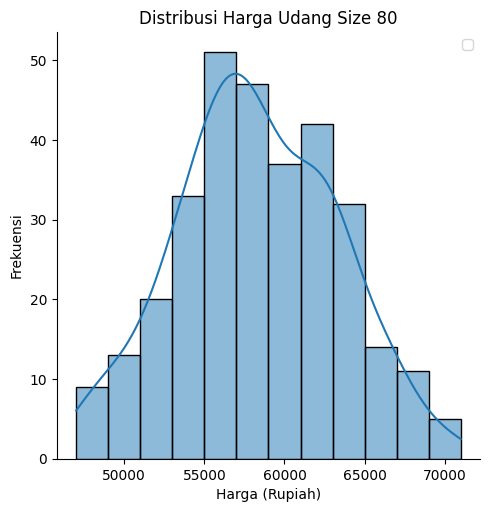

In [78]:
# Distribusi harga size 80
sns.displot(data=data_resampled_week, x='size_80', kde=True)
plt.title('Distribusi Harga Udang Size 80')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Frekuensi')
plt.legend()

In [115]:
# Menghitung pada kolom size_80
print(f"Central Tedency:")
print('Rata-rata harga udang size 80 yaitu:\t',data_resampled_week['size_80'].mean(),'Rupiah')
print('Median dari harga udang size 80 yaitu:\t',data_resampled_week['size_80'].median(),'Rupiah')
print('Modus dari harga udang size 80 yaitu:\t',data_resampled_week['size_80'].mode()[0],'Rupiah')
print(f"\nDispersasi:")
print('Selisih atau range dari data harga udang size 80 yaitu:\t\t', data_resampled_week['size_80'].max() - data_resampled_week['size_80'].min(), 'Rupiah')
print('Nilai minimum dari data harga udang size 80 yaitu:\t\t', data_resampled_week['size_80'].min(), 'Rupiah')
print('Nilai maksimum dari data harga udang size 80 yaitu:\t\t', data_resampled_week['size_80'].max(), 'Rupiah')
print(f"\nSkewness dan Kurtosis:")
print(f"Skewness yang dihasilkan yaitu: {data_resampled_week['size_80'].skew()}")
print(f"Kurtosis yang dihasilkan yaitu: {data_resampled_week['size_80'].kurtosis()}")

Central Tedency:
Rata-rata harga udang size 80 yaitu:	 58234.9920151974 Rupiah
Median dari harga udang size 80 yaitu:	 58000.0 Rupiah
Modus dari harga udang size 80 yaitu:	 59000.0 Rupiah

Dispersasi:
Selisih atau range dari data harga udang size 80 yaitu:		 24000.0 Rupiah
Nilai minimum dari data harga udang size 80 yaitu:		 47000.0 Rupiah
Nilai maksimum dari data harga udang size 80 yaitu:		 71000.0 Rupiah

Skewness dan Kurtosis:
Skewness yang dihasilkan yaitu: 0.032155287889615705
Kurtosis yang dihasilkan yaitu: -0.390510293077603


Dari hasil diatas dapat diperoleh bahwa:
1. Hasil skewness bernilai 0.003 < -0.5  dan menunjukkan bahwa data tergolong approximately symetric.
2. Hasil kurtosis bernilai -0.39 < 3 menujukkan bahwa data tergolong merupakan Platykurtic(long Tailed) dengan high standard deviasion.
3. Berdasarkan poin 1, maka rata-rata lebih tepat untuk menggambarkan distribusi harga size 80. Nilai rata-rata yang dihasilkan yaitu sebesar 58.235 Rupiah.
4. Nilai minimum harga udang vaname untuk size 80 yaitu sebesar 47.000 Rupiah sedangkan maksimumnya sebesar 71.000 Rupiah

## 4.8 Size 100

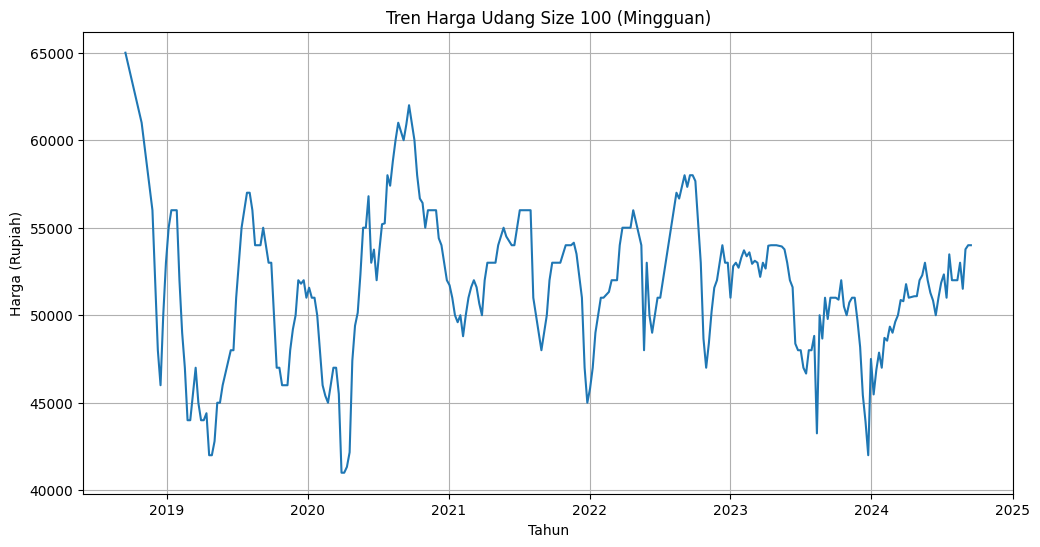

In [81]:
# Plot Size 100
plt.figure(figsize=(12, 6))
plt.plot(data_resampled_week.index, data_resampled_week['size_100'])
plt.title(f"Tren Harga Udang Size 100 (Mingguan)")
plt.xlabel("Tahun")
plt.ylabel("Harga (Rupiah)")
plt.grid(True)
plt.show()

Dari plot tren diatas dapat diketahui bahwa:
1. Data untuk size 100 merupakan **Multiplicative Model** karena data tersebut memiliki lebar & tinggi puncak yang tidak beraturan atau musiman (meningkat/menurun).
2. Terjadi penurunan pada kuartal 2/4 tahun 2019 kemungkinan diakibatkan dari pengurangan permintaan khususnya dari luar negeri dikarenakan stok yang mereka punya sudah penuh. (1)
3. Terjadi penurunan pada kuartal 2/4 tahun 2020 kemungkinan diakibatkan dari adanya pandemi covid-19 yang melanda Indonesia sehingga berpengaruh terhadap permintaan. (2)
4. Terjadi penurunan yang cukup anjlok pada akhir tahun 2022 dan 2023 yang mana disebabkan oleh adanya kelebihan pasokan udang di pasar global serta persaingan yang meningkat dari negara-negara seperti Ekuador dan China. (3)

Sumber:

(1). http://trobosaqua.com/detail-berita/2019/10/10/57/12131/menelisik-sebab-harga-udang-merosot

(2). https://jala.tech/id/blog/tips-budidaya/tren-harga-udang-2020-bagaimana-2021

(3). https://www.liputan6.com/amp/5546128/harga-udang-naik-turun-ekstrem-petambak-diminta-lakukan-ini

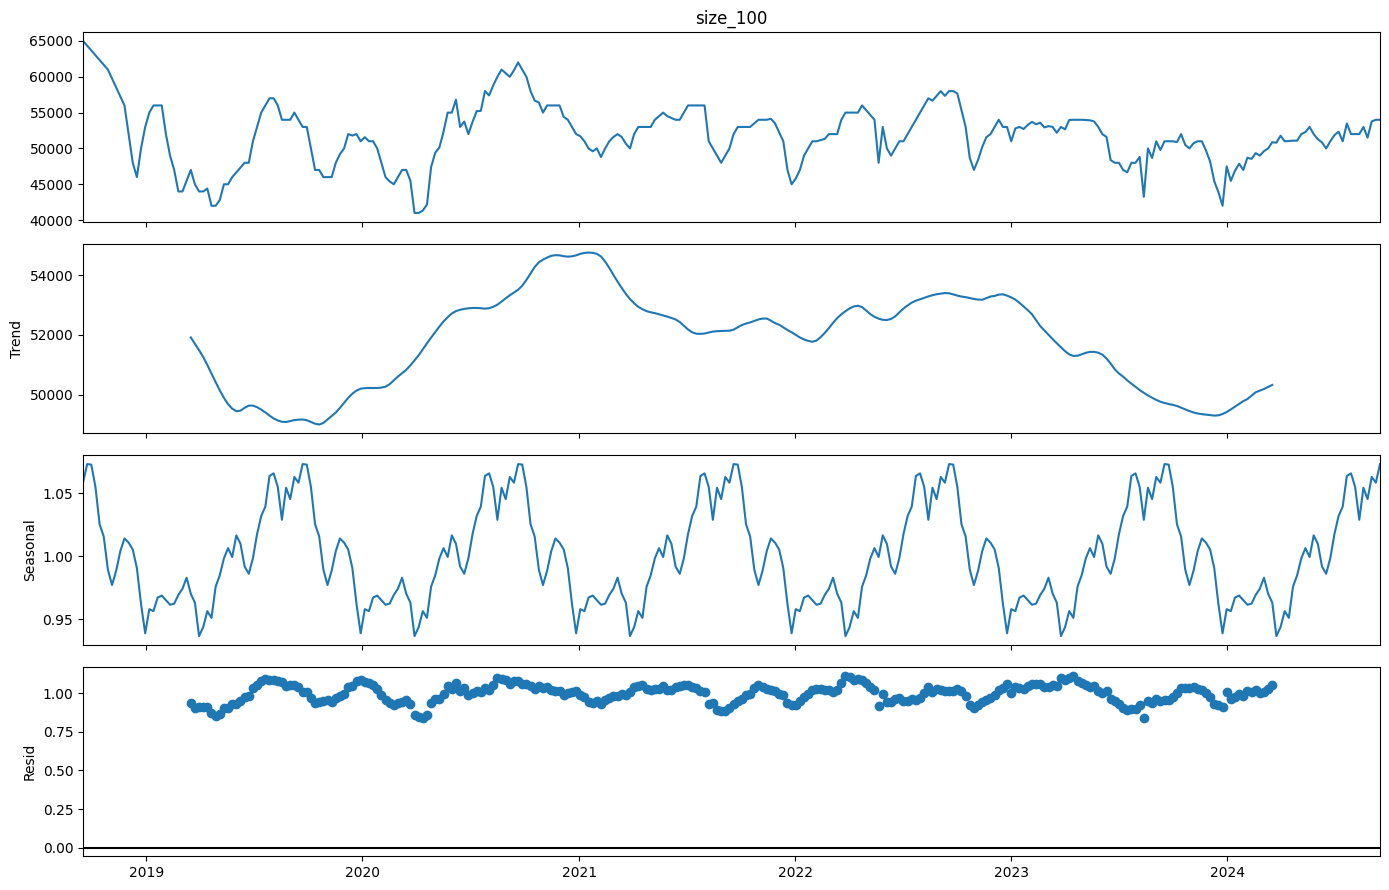

In [140]:
# Decompose the components from the time series.

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data_resampled_week['size_100'], model='multiplicatif')
ax=res.plot()
plt.show()

Dari gambar di atas dapat diperoleh bahwa: 
- Data jelas memiliki **tren naik turun**.
- Pola **musiman** yang jelas dengan durasi tahunan hadir dalam data.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25112\2068519560.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


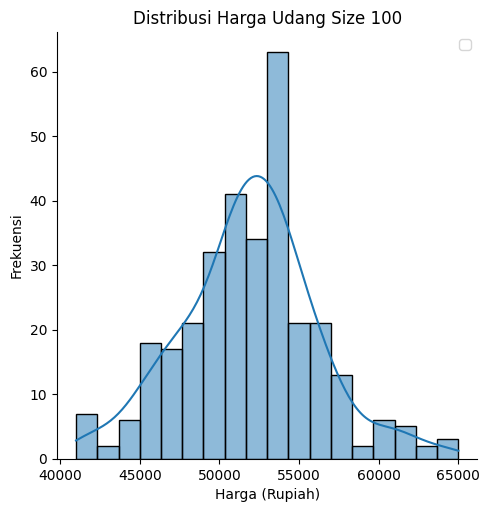

In [79]:
# Distribusi harga size 100
sns.displot(data=data_resampled_week, x='size_100', kde=True)
plt.title('Distribusi Harga Udang Size 100')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Frekuensi')
plt.legend()

In [119]:
# Menghitung pada kolom size_100
print(f"Central Tedency:")
print('Rata-rata harga udang size 100 yaitu:\t',data_resampled_week['size_100'].mean(),'Rupiah')
print('Median dari harga udang size 100 yaitu:\t',data_resampled_week['size_100'].median(),'Rupiah')
print('Modus dari harga udang size 100 yaitu:\t',data_resampled_week['size_100'].mode()[0],'Rupiah')
print(f"\nDispersasi:")
print('Selisih atau range dari data harga udang size 100 yaitu:\t\t', data_resampled_week['size_100'].max() - data_resampled_week['size_100'].min(), 'Rupiah')
print('Nilai minimum dari data harga udang size 100 yaitu:\t\t', data_resampled_week['size_100'].min(), 'Rupiah')
print('Nilai maksimum dari data harga udang size 100 yaitu:\t\t', data_resampled_week['size_100'].max(), 'Rupiah')
print(f"\nSkewness dan Kurtosis:")
print(f"Skewness yang dihasilkan yaitu: {data_resampled_week['size_100'].skew()}")
print(f"Kurtosis yang dihasilkan yaitu: {data_resampled_week['size_100'].kurtosis()}")

Central Tedency:
Rata-rata harga udang size 100 yaitu:	 51865.6268056966 Rupiah
Median dari harga udang size 100 yaitu:	 52000.0 Rupiah
Modus dari harga udang size 100 yaitu:	 53000.0 Rupiah

Dispersasi:
Selisih atau range dari data harga udang size 100 yaitu:		 24000.0 Rupiah
Nilai minimum dari data harga udang size 100 yaitu:		 41000.0 Rupiah
Nilai maksimum dari data harga udang size 100 yaitu:		 65000.0 Rupiah

Skewness dan Kurtosis:
Skewness yang dihasilkan yaitu: 0.08712801446761569
Kurtosis yang dihasilkan yaitu: 0.4651989989655112


Dari hasil diatas dapat diperoleh bahwa:
1. Hasil skewness bernilai 0.08 < -0.5  dan menunjukkan bahwa data tergolong approximately symetric.
2. Hasil kurtosis bernilai -0.46 < 3 menujukkan bahwa data tergolong merupakan Platykurtic(long Tailed) dengan high standard deviasion.
3. Berdasarkan poin 1, maka rata-rata lebih tepat untuk menggambarkan distribusi harga size 100. Nilai rata-rata yang dihasilkan yaitu sebesar 51.865 Rupiah.
4. Nilai minimum harga udang vaname untuk size 100 yaitu sebesar 41.000 Rupiah sedangkan maksimumnya sebesar 65.000 Rupiah

## 4.9 Recapitulation

In [82]:
# Rangkuman
df_statistik = data_resampled_week.describe().T
df_statistik

,count,mean,std,min,25%,50%,75%,max
size_30,314.0,87180.673722,9537.657489,61000.0,80271.367521,89000.000000,94000.0,104000.0
size_40,314.0,77168.251503,7582.970621,53000.0,72581.521739,77000.000000,82000.0,94000.0
size_50,314.0,67667.335661,5529.576820,53600.0,63350.000000,68000.000000,72000.0,81000.0
size_60,314.0,64542.453352,5298.722912,51600.0,60678.571429,64715.217391,68375.0,77000.0
size_70,314.0,61607.741948,5158.561734,49600.0,58000.000000,61333.333333,65437.5,74000.0
size_80,314.0,58234.992015,4981.970075,47000.0,55000.000000,58000.000000,62000.0,71000.0
size_100,314.0,51865.626806,4261.497497,41000.0,49360.869565,52000.000000,54000.0,65000.0


Dari tabel diatas dapat dilihat bahwa makin besar size udang maka harganya makin murah. Hal tersebut dikarenakan "size" disini bukan ukuran dari 1 udang melainkan diterjemahkan sebagai misalnya size 100, diartikan "Dalam 1 kilogram terdapat 100 udang" sehingga makin dikit jumlah udangnya harganya semakin mahal.  

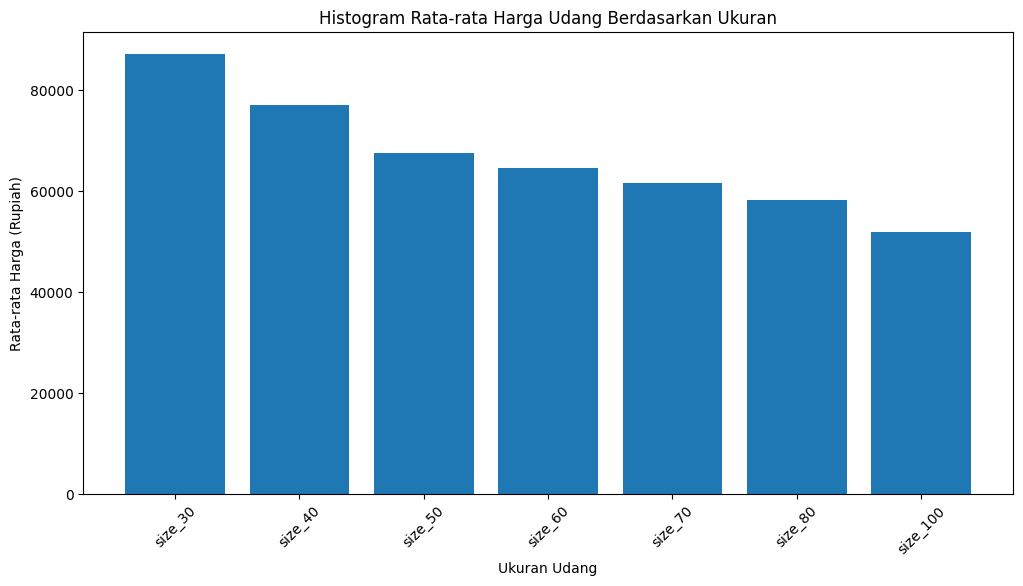

In [83]:
# Histogram rata-rata harga udang
plt.figure(figsize=(12, 6))
plt.bar(df_statistik.index, df_statistik['mean'])
plt.title('Histogram Rata-rata Harga Udang Berdasarkan Ukuran')
plt.xlabel('Ukuran Udang')
plt.ylabel('Rata-rata Harga (Rupiah)')
plt.xticks(rotation=45)
plt.show()


Dari grafik dibuktikan juga yang mana makin banyak sedikit jumlah udang "size 30" maka harganya makin mahal

# 5. Conclusion

Dapat disimpulkan bahwa harga udang vaname di Provinsi Jawa Timur cenderung berfluktuasi yang mana dipengaruhi oleh permintaan konsumen. Penentuan harga juga ditentukan berdasarkan size yang mana makin besar size udang maka harganya makin murah. Hal tersebut dikarenakan "size" disini bukan ukuran dari 1 udang melainkan diterjemahkan sebagai misalnya size 100, diartikan "Dalam 1 kilogram terdapat 100 udang" sehingga makin dikit jumlah udangnya harganya semakin mahal.  